In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits import mplot3d
import seaborn as sns
import numpy as np
import pytry
import pickle
import glob
import pandas as pd
import os
import random

from scipy import stats
import researchpy as rp
from scipy.stats import norm, ttest_ind, f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison
from math import sqrt

import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, classification_report, precision_score
from sklearn.dummy import DummyClassifier
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

C:\Users\mbartlett2\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


Load data.

In [2]:
lrraw_clip = pd.read_pickle("./lrraw_clip.pkl") #logistic regression without lmus
lrlmu_clip = pd.read_pickle("./lrlmu_clip.pkl") #logistic regression with lmus
mlpraw_clip = pd.read_pickle("./mlpraw_clip.pkl") #mlp without lmus
mlplmu_clip = pd.read_pickle("./mlplmu_clip.pkl") #mlp without lmus

# Frame-by-Frame Classification

## LR Without LMUs

In [3]:
lrraw_highframes=[]
lrraw_midframes=[]
lrraw_lowframes=[]
lrraw_randframes=[]
for i in range(20):
    a=np.vstack(lrraw_clip['prediction_prob_high'][i])
    lrraw_highframes.append(a)
    
    b=np.vstack(lrraw_clip['prediction_prob_mid'][i])
    lrraw_midframes.append(b)
    
    c=np.vstack(lrraw_clip['prediction_prob_low'][i])
    lrraw_lowframes.append(c)
    
    d=np.vstack(lrraw_clip['prediction_prob_random'][i])
    lrraw_randframes.append(d)
    
lrraw_highframes_all = np.vstack(lrraw_highframes)
lrraw_midframes_all = np.vstack(lrraw_midframes)
lrraw_lowframes_all = np.vstack(lrraw_lowframes)
lrraw_randframes_all = np.vstack(lrraw_randframes)

Now we look at the distribution of classification values given to frames from each type of clip. <br>
Also calculate the percentage of frames which were given the correct classification. <br>
For high engagement clips, correct = 1. <br>
For intermediate engagement, correct is >1 and <0. <br>
For low engagement, correct = 0.

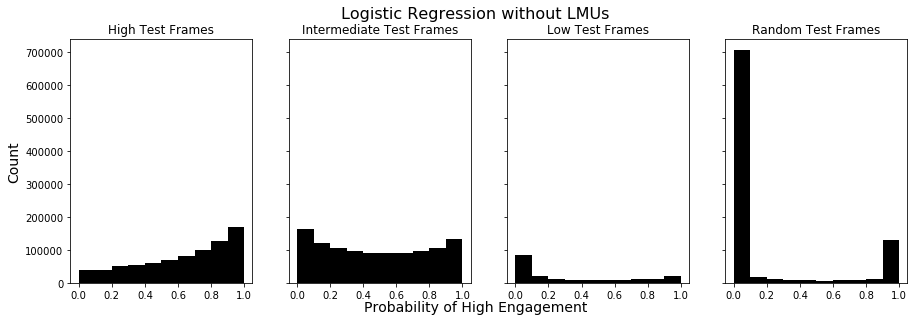

In [4]:
bins=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

#plot histograms - x-axis = probability of high engagement, y-axis = count
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, sharex=True, figsize=(15, 4.5))
(nh, bins, plot) = ax1.hist(lrraw_highframes_all[:,1], bins=bins, color='black')
ax1.title.set_text('High Test Frames')
ax1.set_ylabel('Count', fontsize=14)
(nm, bins, plot) = ax2.hist(lrraw_midframes_all[:,1], bins=bins, color='black')
ax2.title.set_text('Intermediate Test Frames')
(nl, bins, plot) = ax3.hist(lrraw_lowframes_all[:,1], bins=bins, color='black')
ax3.title.set_text('Low Test Frames')
ax4.hist(lrraw_randframes_all[:,1], bins=bins, color='black')
ax4.title.set_text('Random Test Frames')

n_int = nm[1]+nm[2]+nm[3]+nm[4]+nm[5]+nm[6]+nm[7]+nm[8]
lrrhigh_cor = (nh[9]/len(lrraw_highframes_all))*100
lrrmid_cor = (n_int/len(lrraw_midframes_all))*100
lrrlow_cor = (nl[0]/len(lrraw_lowframes_all))*100

fig.suptitle('Logistic Regression without LMUs', fontsize=16)
fig.text(0.5, 0.04, 'Probability of High Engagement', ha='center', fontsize=14)
fig.savefig('lrraw_frame_hist.png')

## LR With LMUs

In [5]:
lrlmu_highframes=[]
lrlmu_midframes=[]
lrlmu_lowframes=[]
lrlmu_randframes=[]
for i in range(20):
    a=np.vstack(lrlmu_clip['prediction_prob_high'][i])
    lrlmu_highframes.append(a)
    
    b=np.vstack(lrlmu_clip['prediction_prob_mid'][i])
    lrlmu_midframes.append(b)
    
    c=np.vstack(lrlmu_clip['prediction_prob_low'][i])
    lrlmu_lowframes.append(c)
    
    d=np.vstack(lrlmu_clip['prediction_prob_random'][i])
    lrlmu_randframes.append(d)
    
lrlmu_highframes_all = np.vstack(lrlmu_highframes)
lrlmu_midframes_all = np.vstack(lrlmu_midframes)
lrlmu_lowframes_all = np.vstack(lrlmu_lowframes)
lrlmu_randframes_all = np.vstack(lrlmu_randframes)

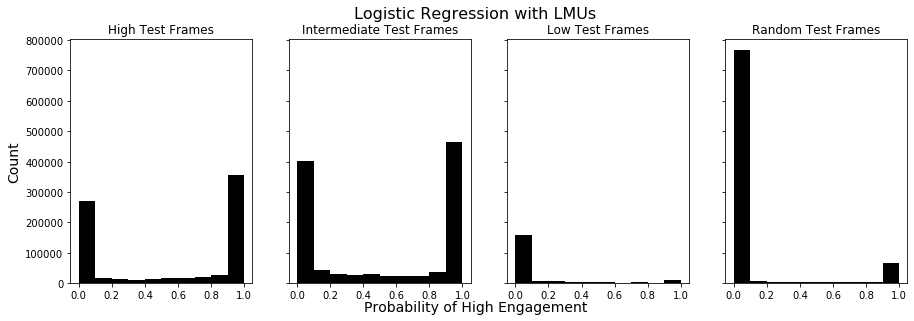

In [6]:
bins=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

#plot histograms - x-axis = probability of high engagement, y-axis = count
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, sharex=True, figsize=(15, 4.5))
(nh, bins, plot) = ax1.hist(lrlmu_highframes_all[:,1], bins=bins, color='black')
ax1.title.set_text('High Test Frames')
ax1.set_ylabel('Count', fontsize=14)
(nm, bins, plot) = ax2.hist(lrlmu_midframes_all[:,1], bins=bins, color='black')
ax2.title.set_text('Intermediate Test Frames')
(nl, bins, plot) = ax3.hist(lrlmu_lowframes_all[:,1], bins=bins, color='black')
ax3.title.set_text('Low Test Frames')
ax4.hist(lrlmu_randframes_all[:,1], bins=bins, color='black')
ax4.title.set_text('Random Test Frames')

n_int = nm[1]+nm[2]+nm[3]+nm[4]+nm[5]+nm[6]+nm[7]+nm[8]
lrlhigh_cor = (nh[9]/len(lrlmu_highframes_all))*100
lrlmid_cor = (n_int/len(lrlmu_midframes_all))*100
lrllow_cor = (nl[0]/len(lrlmu_lowframes_all))*100

fig.suptitle('Logistic Regression with LMUs', fontsize=16)
fig.text(0.5, 0.04, 'Probability of High Engagement', ha='center', fontsize=14)

fig.savefig('lrlmu_frame_hist.png')

## MLP Without LMUs

In [7]:
mlpraw_highframes=[]
mlpraw_midframes=[]
mlpraw_lowframes=[]
mlpraw_randframes=[]
for i in range(20):
    a=np.vstack(mlpraw_clip['decision_high'][i])
    mlpraw_highframes.append(a)
    
    b=np.vstack(mlpraw_clip['decision_mid'][i])
    mlpraw_midframes.append(b)
    
    c=np.vstack(mlpraw_clip['decision_low'][i])
    mlpraw_lowframes.append(c)
    
    d=np.vstack(mlpraw_clip['decision_random'][i])
    mlpraw_randframes.append(d)
    
mlpraw_highframes_all = np.vstack(mlpraw_highframes)
mlpraw_midframes_all = np.vstack(mlpraw_midframes)
mlpraw_lowframes_all = np.vstack(mlpraw_lowframes)
mlpraw_randframes_all = np.vstack(mlpraw_randframes)

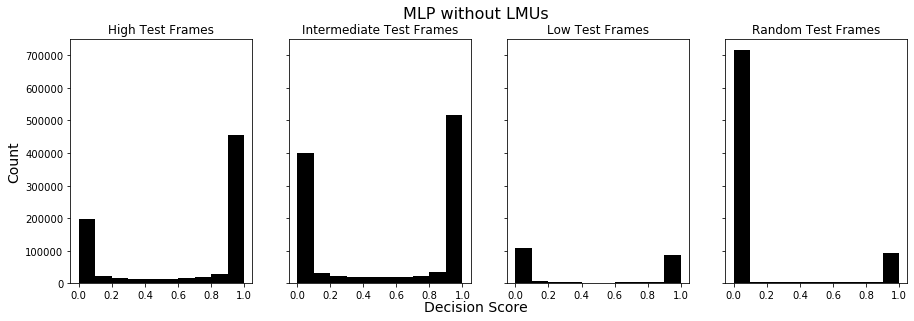

In [8]:
bins=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

#plot histograms - x-axis = decision score, y-axis = count
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, sharex=True, figsize=(15, 4.5))
(nh, bins, plot) = ax1.hist(mlpraw_highframes_all[:,0], bins=bins, color='black')
ax1.title.set_text('High Test Frames')
ax1.set_ylabel('Count', fontsize=14)
(nm, bins, plot) = ax2.hist(mlpraw_midframes_all[:,0], bins=bins, color='black')
ax2.title.set_text('Intermediate Test Frames')
(nl, bins, plot) = ax3.hist(mlpraw_lowframes_all[:,0], bins=bins, color='black')
ax3.title.set_text('Low Test Frames')
ax4.hist(mlpraw_randframes_all[:,0], bins=bins, color='black')
ax4.title.set_text('Random Test Frames')

n_int = nm[1]+nm[2]+nm[3]+nm[4]+nm[5]+nm[6]+nm[7]+nm[8]
mlprhigh_cor = (nh[9]/len(mlpraw_highframes_all))*100
mlprmid_cor = (n_int/len(mlpraw_midframes_all))*100
mlprlow_cor = (nl[0]/len(mlpraw_lowframes_all))*100

fig.suptitle('MLP without LMUs', fontsize=16)
fig.text(0.5, 0.04, 'Decision Score', ha='center', fontsize=14)
fig.savefig('mlpraw_frame_hist.png')

## MLP With LMUs

In [9]:
mlplmu_highframes=[]
mlplmu_midframes=[]
mlplmu_lowframes=[]
mlplmu_randframes=[]
for i in range(20):
    a=np.vstack(mlplmu_clip['decision_high'][i])
    mlplmu_highframes.append(a)
    
    b=np.vstack(mlplmu_clip['decision_mid'][i])
    mlplmu_midframes.append(b)
    
    c=np.vstack(mlplmu_clip['decision_low'][i])
    mlplmu_lowframes.append(c)
    
    d=np.vstack(mlplmu_clip['decision_random'][i])
    mlplmu_randframes.append(d)
    
mlplmu_highframes_all = np.vstack(mlplmu_highframes)
mlplmu_midframes_all = np.vstack(mlplmu_midframes)
mlplmu_lowframes_all = np.vstack(mlplmu_lowframes)
mlplmu_randframes_all = np.vstack(mlplmu_randframes)

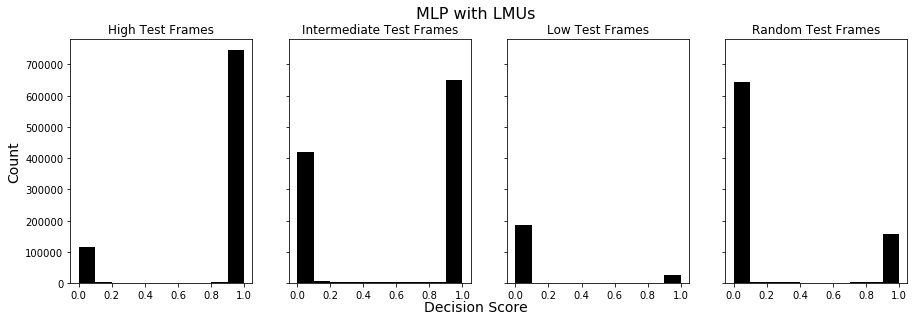

In [10]:
bins=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

#plot histograms - x-axis = decision score, y-axis = count
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, sharex=True, figsize=(15, 4.5))
ax1.hist(mlplmu_highframes_all[:,0], bins=bins, color='black')
ax1.title.set_text('High Test Frames')
ax1.set_ylabel('Count', fontsize=14)
ax2.hist(mlplmu_midframes_all[:,0], bins=bins, color='black')
ax2.title.set_text('Intermediate Test Frames')
ax3.hist(mlplmu_lowframes_all[:,0], bins=bins, color='black')
ax3.title.set_text('Low Test Frames')
ax4.hist(mlplmu_randframes_all[:,0], bins=bins, color='black')
ax4.title.set_text('Random Test Frames')

fig.suptitle('MLP with LMUs', fontsize=16)
fig.text(0.5, 0.04, 'Decision Score', ha='center', fontsize=14)
fig.savefig('mlplmu_frame_hist.png')

## Percent Correct

In [11]:
#Create list of how many frames were correctly classified in each experiment
high_counts=[]
mid_counts=[]
low_counts=[]
for i in range(20):
    (nh, bins, plot) = ax1.hist(np.vstack(lrraw_clip['prediction_prob_high'][i]), bins=bins)
    high_counts.append(nh)
    (nm, bins, plot) = ax2.hist(np.vstack(lrraw_clip['prediction_prob_mid'][i]), bins=bins)
    mid_counts.append(nm)
    (nl, bins, plot) = ax2.hist(np.vstack(lrraw_clip['prediction_prob_low'][i]), bins=bins)
    low_counts.append(nl)
    
high_cor = [item[1][9] for item in high_counts] #no. high frames classified correctly in each experiment
high_len = [sum(item[1]) for item in high_counts] #no. high frames total in each experiment

mid_cor = [(item[1][1]+item[1][2]+item[1][3]+item[1][4]+item[1][5]+item[1][6]+item[1][7]+item[1][8]) for item in mid_counts] #no. mid frames classified correctly in each experiment
mid_len = [sum(item[1]) for item in mid_counts] #no. mid frames total in each experiment

low_cor = [item[1][0] for item in low_counts] #no. low frames classified correctly in each experiment
low_len = [sum(item[1]) for item in low_counts] #no. low frames total in each experiment

#Calculate percent correct in each experiment for each class (3 lists of 20 percentages)
high_percent=[]
mid_percent=[]
low_percent=[]
for i in range(20):
    high_percent.append((high_cor[i]/high_len[i])*100)
    mid_percent.append((mid_cor[i]/mid_len[i])*100)
    low_percent.append((low_cor[i]/low_len[i])*100)
    
high_percent=np.asarray(high_percent)
mid_percent=np.asarray(mid_percent)
low_percent=np.asarray(low_percent)

#Calculate mean percent correct and standard deviation for each clip type
lrrhigh_cor_mean=high_percent.mean()
lrrhigh_cor_sd=high_percent.std()
lrrmid_cor_mean=mid_percent.mean()
lrrmid_cor_sd=mid_percent.std()
lrrlow_cor_mean=low_percent.mean()
lrrlow_cor_sd=low_percent.std()

In [12]:
#Create list of how many frames were correctly classified in each experiment
high_counts=[]
mid_counts=[]
low_counts=[]
for i in range(20):
    (nh, bins, plot) = ax1.hist(np.vstack(lrlmu_clip['prediction_prob_high'][i]), bins=bins)
    high_counts.append(nh)
    (nm, bins, plot) = ax2.hist(np.vstack(lrlmu_clip['prediction_prob_mid'][i]), bins=bins)
    mid_counts.append(nm)
    (nl, bins, plot) = ax2.hist(np.vstack(lrlmu_clip['prediction_prob_low'][i]), bins=bins)
    low_counts.append(nl)
    
high_cor = [item[1][9] for item in high_counts] #no. high frames classified correctly in each experiment
high_len = [sum(item[1]) for item in high_counts] #no. high frames total in each experiment

mid_cor = [(item[1][1]+item[1][2]+item[1][3]+item[1][4]+item[1][5]+item[1][6]+item[1][7]+item[1][8]) for item in mid_counts] #no. mid frames classified correctly in each experiment
mid_len = [sum(item[1]) for item in mid_counts] #no. mid frames total in each experiment

low_cor = [item[1][0] for item in low_counts] #no. low frames classified correctly in each experiment
low_len = [sum(item[1]) for item in low_counts] #no. low frames total in each experiment

#Calculate percent correct in each experiment for each class (3 lists of 20 percentages)
high_percent=[]
mid_percent=[]
low_percent=[]
for i in range(20):
    high_percent.append((high_cor[i]/high_len[i])*100)
    mid_percent.append((mid_cor[i]/mid_len[i])*100)
    low_percent.append((low_cor[i]/low_len[i])*100)
    
high_percent=np.asarray(high_percent)
mid_percent=np.asarray(mid_percent)
low_percent=np.asarray(low_percent)

#Calculate mean percent correct and standard deviation for each clip type
lrlmuhigh_cor_mean=high_percent.mean()
lrlmuhigh_cor_sd=high_percent.std()
lrlmumid_cor_mean=mid_percent.mean()
lrlmumid_cor_sd=mid_percent.std()
lrlmulow_cor_mean=low_percent.mean()
lrlmulow_cor_sd=low_percent.std()

In [13]:
#Create list of how many frames were correctly classified in each experiment
high_counts=[]
mid_counts=[]
low_counts=[]
for i in range(20):
    (nh, bins, plot) = ax1.hist(np.vstack(mlpraw_clip['decision_high'][i]), bins=bins)
    high_counts.append(nh)
    (nm, bins, plot) = ax2.hist(np.vstack(mlpraw_clip['decision_mid'][i]), bins=bins)
    mid_counts.append(nm)
    (nl, bins, plot) = ax2.hist(np.vstack(mlpraw_clip['decision_low'][i]), bins=bins)
    low_counts.append(nl)
    
high_cor = [item[9] for item in high_counts] #no. high frames classified correctly in each experiment
high_len = [sum(item) for item in high_counts] #no. high frames total in each experiment

mid_cor = [(item[1]+item[2]+item[3]+item[4]+item[5]+item[6]+item[7]+item[8]) for item in mid_counts] #no. mid frames classified correctly in each experiment
mid_len = [sum(item) for item in mid_counts] #no. mid frames total in each experiment

low_cor = [item[0] for item in low_counts] #no. low frames classified correctly in each experiment
low_len = [sum(item) for item in low_counts] #no. low frames total in each experiment

#Calculate percent correct in each experiment for each class (3 lists of 20 percentages)
high_percent=[]
mid_percent=[]
low_percent=[]
for i in range(20):
    high_percent.append((high_cor[i]/high_len[i])*100)
    mid_percent.append((mid_cor[i]/mid_len[i])*100)
    low_percent.append((low_cor[i]/low_len[i])*100)
    
high_percent=np.asarray(high_percent)
mid_percent=np.asarray(mid_percent)
low_percent=np.asarray(low_percent)

#Calculate mean percent correct and standard deviation for each clip type
mlprhigh_cor_mean=high_percent.mean()
mlprhigh_cor_sd=high_percent.std()
mlprmid_cor_mean=mid_percent.mean()
mlprmid_cor_sd=mid_percent.std()
mlprlow_cor_mean=low_percent.mean()
mlprlow_cor_sd=low_percent.std()

In [14]:
#Create list of how many frames were correctly classified in each experiment
high_counts=[]
mid_counts=[]
low_counts=[]
for i in range(20):
    (nh, bins, plot) = ax1.hist(np.vstack(mlplmu_clip['decision_high'][i]), bins=bins)
    high_counts.append(nh)
    (nm, bins, plot) = ax2.hist(np.vstack(mlplmu_clip['decision_mid'][i]), bins=bins)
    mid_counts.append(nm)
    (nl, bins, plot) = ax2.hist(np.vstack(mlplmu_clip['decision_low'][i]), bins=bins)
    low_counts.append(nl)
    
high_cor = [item[9] for item in high_counts] #no. high frames classified correctly in each experiment
high_len = [sum(item) for item in high_counts] #no. high frames total in each experiment

mid_cor = [(item[1]+item[2]+item[3]+item[4]+item[5]+item[6]+item[7]+item[8]) for item in mid_counts] #no. mid frames classified correctly in each experiment
mid_len = [sum(item) for item in mid_counts] #no. mid frames total in each experiment

low_cor = [item[0] for item in low_counts] #no. low frames classified correctly in each experiment
low_len = [sum(item) for item in low_counts] #no. low frames total in each experiment

#Calculate percent correct in each experiment for each class (3 lists of 20 percentages)
high_percent=[]
mid_percent=[]
low_percent=[]
for i in range(20):
    high_percent.append((high_cor[i]/high_len[i])*100)
    mid_percent.append((mid_cor[i]/mid_len[i])*100)
    low_percent.append((low_cor[i]/low_len[i])*100)
    
high_percent=np.asarray(high_percent)
mid_percent=np.asarray(mid_percent)
low_percent=np.asarray(low_percent)

#Calculate mean percent correct and standard deviation for each clip type
mlplmuhigh_cor_mean=high_percent.mean()
mlplmuhigh_cor_sd=high_percent.std()
mlplmumid_cor_mean=mid_percent.mean()
mlplmumid_cor_sd=mid_percent.std()
mlplmulow_cor_mean=low_percent.mean()
mlplmulow_cor_sd=low_percent.std()

In [15]:
Percent_Correct_Frames = pd.DataFrame({'LR w/o LMU M(SD)': [f'{lrrhigh_cor_mean:.2f}'+'%'+' ('+f'{lrrhigh_cor_sd:.2f}'+')',
                                                  f'{lrrmid_cor_mean:.2f}'+'%'+' ('+f'{lrrmid_cor_sd:.2f}'+')',
                                                  f'{lrrlow_cor_mean:.2f}'+'%'+' ('+f'{lrrlow_cor_sd:.2f}'+')'],
                                'LR with LMU M(SD)': [f'{lrlmuhigh_cor_mean:.2f}'+'%'+' ('+f'{lrlmuhigh_cor_sd:.2f}'+')',
                                                  f'{lrlmumid_cor_mean:.2f}'+'%'+' ('+f'{lrlmumid_cor_sd:.2f}'+')',
                                                  f'{lrlmulow_cor_mean:.2f}'+'%'+' ('+f'{lrlmulow_cor_sd:.2f}'+')'],
                                'MLP w/o LMU M(SD)': [f'{mlprhigh_cor_mean:.2f}'+'%'+' ('+f'{mlprhigh_cor_sd:.2f}'+')',
                                                  f'{mlprmid_cor_mean:.2f}'+'%'+' ('+f'{mlprmid_cor_sd:.2f}'+')',
                                                  f'{mlprlow_cor_mean:.2f}'+'%'+' ('+f'{mlprlow_cor_sd:.2f}'+')'],
                                'MLP with LMU M(SD)': [f'{mlplmuhigh_cor_mean:.2f}'+'%'+' ('+f'{mlplmuhigh_cor_sd:.2f}'+')',
                                                  f'{mlplmumid_cor_mean:.2f}'+'%'+' ('+f'{mlplmumid_cor_sd:.2f}'+')',
                                                  f'{mlplmulow_cor_mean:.2f}'+'%'+' ('+f'{mlplmulow_cor_sd:.2f}'+')']})

Percent_Correct_Frames.set_index([pd.Index(['High Engagement', 'Intermediate Engagement', 'Low Engagement'])])

,LR w/o LMU M(SD),LR with LMU M(SD),MLP w/o LMU M(SD),MLP with LMU M(SD)
High Engagement,21.93% (8.19),49.59% (14.96),60.97% (16.90),87.84% (11.38)
Intermediate Engagement,73.14% (4.84),21.61% (2.89),17.17% (3.35),3.27% (0.83)
Low Engagement,41.12% (15.40),76.00% (9.14),49.12% (18.00),85.10% (8.46)


# Mean Output for each Clip separated by Class

Calculate and Collect Summary Statistics

Logistic Regression without LMUs. <br>
Get mean, std, skewness and kurtosis of probability of high engagement classification over each clip.

In [16]:
high_summary=[]
mid_summary=[]
low_summary=[]
random_summary=[]

summaries=[]

for j in range(len(lrraw_clip)):
    for i in range(18):
        mean=lrraw_clip.iloc[j]['prediction_prob_high'][i][:,1].mean()
        std=lrraw_clip.iloc[j]['prediction_prob_high'][i][:,1].std()
        skew=stats.skew(lrraw_clip.iloc[j]['prediction_prob_high'][i][:,1])
        kurtosis=stats.kurtosis(lrraw_clip.iloc[j]['prediction_prob_high'][i][:,1])
        label='high'
        high_summary.append([mean,std,skew,kurtosis])
        summaries.append([mean,std,skew,kurtosis,label])
    for i in range(52):
        mean=lrraw_clip.iloc[j]['prediction_prob_mid'][i][:,1].mean()
        std=lrraw_clip.iloc[j]['prediction_prob_mid'][i][:,1].std()
        skew=stats.skew(lrraw_clip.iloc[j]['prediction_prob_mid'][i][:,1])
        kurtosis=stats.kurtosis(lrraw_clip.iloc[j]['prediction_prob_mid'][i][:,1])
        label='mid'
        mid_summary.append([mean,std,skew,kurtosis])
        summaries.append([mean,std,skew,kurtosis,label])
    for i in range(18):
        mean=lrraw_clip.iloc[j]['prediction_prob_low'][i][:,1].mean()
        std=lrraw_clip.iloc[j]['prediction_prob_low'][i][:,1].std()
        skew=stats.skew(lrraw_clip.iloc[j]['prediction_prob_low'][i][:,1])
        kurtosis=stats.kurtosis(lrraw_clip.iloc[j]['prediction_prob_low'][i][:,1])
        label='low'
        low_summary.append([mean,std,skew,kurtosis])
        summaries.append([mean,std,skew,kurtosis,label])
    for i in range(18):
        mean=lrraw_clip.iloc[j]['prediction_prob_random'][i][:,1].mean()
        std=lrraw_clip.iloc[j]['prediction_prob_random'][i][:,1].std()
        skew=stats.skew(lrraw_clip.iloc[j]['prediction_prob_random'][i][:,1])
        kurtosis=stats.kurtosis(lrraw_clip.iloc[j]['prediction_prob_random'][i][:,1])
        label='random'
        random_summary.append([mean,std,skew,kurtosis])
        summaries.append([mean,std,skew,kurtosis,label])
        
high_lrraw_summary=np.asarray(high_summary)
mid_lrraw_summary=np.asarray(mid_summary)
low_lrraw_summary=np.asarray(low_summary)
random_lrraw_summary=np.asarray(random_summary)
summaries_lrraw=np.asarray(summaries)

Logistic Regression with LMUs. <br>
Get mean, std, skewness and kurtosis of probability of high engagement classification over each clip.

In [17]:
high_summary=[]
mid_summary=[]
low_summary=[]
random_summary=[]

summaries=[]

for j in range(len(lrlmu_clip)):
    for i in range(18):
        mean=lrlmu_clip.iloc[j]['prediction_prob_high'][i][:,1].mean()
        std=lrlmu_clip.iloc[j]['prediction_prob_high'][i][:,1].std()
        skew=stats.skew(lrlmu_clip.iloc[j]['prediction_prob_high'][i][:,1])
        kurtosis=stats.kurtosis(lrlmu_clip.iloc[j]['prediction_prob_high'][i][:,1])
        label='high'
        high_summary.append([mean,std,skew,kurtosis])
        summaries.append([mean,std,skew,kurtosis,label])
    for i in range(52):
        mean=lrlmu_clip.iloc[j]['prediction_prob_mid'][i][:,1].mean()
        std=lrlmu_clip.iloc[j]['prediction_prob_mid'][i][:,1].std()
        skew=stats.skew(lrlmu_clip.iloc[j]['prediction_prob_mid'][i][:,1])
        kurtosis=stats.kurtosis(lrlmu_clip.iloc[j]['prediction_prob_mid'][i][:,1])
        label='mid'
        mid_summary.append([mean,std,skew,kurtosis])
        summaries.append([mean,std,skew,kurtosis,label])
    for i in range(18):
        mean=lrlmu_clip.iloc[j]['prediction_prob_low'][i][:,1].mean()
        std=lrlmu_clip.iloc[j]['prediction_prob_low'][i][:,1].std()
        skew=stats.skew(lrlmu_clip.iloc[j]['prediction_prob_low'][i][:,1])
        kurtosis=stats.kurtosis(lrlmu_clip.iloc[j]['prediction_prob_low'][i][:,1])
        label='low'
        low_summary.append([mean,std,skew,kurtosis])
        summaries.append([mean,std,skew,kurtosis,label])
    for i in range(18):
        mean=lrlmu_clip.iloc[j]['prediction_prob_random'][i][:,1].mean()
        std=lrlmu_clip.iloc[j]['prediction_prob_random'][i][:,1].std()
        skew=stats.skew(lrlmu_clip.iloc[j]['prediction_prob_random'][i][:,1])
        kurtosis=stats.kurtosis(lrlmu_clip.iloc[j]['prediction_prob_random'][i][:,1])
        label='random'
        random_summary.append([mean,std,skew,kurtosis])
        summaries.append([mean,std,skew,kurtosis,label])
        
high_lrlmu_summary=np.asarray(high_summary)
mid_lrlmu_summary=np.asarray(mid_summary)
low_lrlmu_summary=np.asarray(low_summary)
random_lrlmu_summary=np.asarray(random_summary)
summaries_lrlmu=np.asarray(summaries)

MLP without LMUs. <br>
Get mean, std, skewness and kurtosis of the decision values over each clip.

In [18]:
high_summary=[]
mid_summary=[]
low_summary=[]
random_summary=[]

summaries=[]

for j in range(len(mlpraw_clip)):
    for i in range(18):
        mean=mlpraw_clip.iloc[j]['decision_high'][i][:,0].mean()
        std=mlpraw_clip.iloc[j]['decision_high'][i][:,0].std()
        skew=stats.skew(mlpraw_clip.iloc[j]['decision_high'][i][:,0])
        kurtosis=stats.kurtosis(mlpraw_clip.iloc[j]['decision_high'][i][:,0])
        label='high'
        high_summary.append([mean,std,skew,kurtosis])
        summaries.append([mean,std,skew,kurtosis,label])
    for i in range(52):
        mean=mlpraw_clip.iloc[j]['decision_mid'][i][:,0].mean()
        std=mlpraw_clip.iloc[j]['decision_mid'][i][:,0].std()
        skew=stats.skew(mlpraw_clip.iloc[j]['decision_mid'][i][:,0])
        kurtosis=stats.kurtosis(mlpraw_clip.iloc[j]['decision_mid'][i][:,0])
        label='mid'
        mid_summary.append([mean,std,skew,kurtosis])
        summaries.append([mean,std,skew,kurtosis,label])
    for i in range(18):
        mean=mlpraw_clip.iloc[j]['decision_low'][i][:,0].mean()
        std=mlpraw_clip.iloc[j]['decision_low'][i][:,0].std()
        skew=stats.skew(mlpraw_clip.iloc[j]['decision_low'][i][:,0])
        kurtosis=stats.kurtosis(mlpraw_clip.iloc[j]['decision_low'][i][:,0])
        label='low'
        low_summary.append([mean,std,skew,kurtosis])
        summaries.append([mean,std,skew,kurtosis,label])
    for i in range(18):
        mean=mlpraw_clip.iloc[j]['decision_random'][i][:,0].mean()
        std=mlpraw_clip.iloc[j]['decision_random'][i][:,0].std()
        skew=stats.skew(mlpraw_clip.iloc[j]['decision_random'][i][:,0])
        kurtosis=stats.kurtosis(mlpraw_clip.iloc[j]['decision_random'][i][:,0])
        label='random'
        random_summary.append([mean,std,skew,kurtosis])
        summaries.append([mean,std,skew,kurtosis,label])
        
high_mlpraw_summary=np.asarray(high_summary)
mid_mlpraw_summary=np.asarray(mid_summary)
low_mlpraw_summary=np.asarray(low_summary)
random_mlpraw_summary=np.asarray(random_summary)
summaries_mlpraw=np.asarray(summaries)

MLP with LMUs. <br>
Get mean, std, skewness and kurtosis of the decision values over each clip.

In [19]:
high_summary=[]
mid_summary=[]
low_summary=[]
random_summary=[]

summaries=[]

for j in range(len(mlplmu_clip)):
    for i in range(18):
        mean=mlplmu_clip.iloc[j]['decision_high'][i][:,0].mean()
        std=mlplmu_clip.iloc[j]['decision_high'][i][:,0].std()
        skew=stats.skew(mlplmu_clip.iloc[j]['decision_high'][i][:,0])
        kurtosis=stats.kurtosis(mlplmu_clip.iloc[j]['decision_high'][i][:,0])
        label='high'
        high_summary.append([mean,std,skew,kurtosis])
        summaries.append([mean,std,skew,kurtosis,label])
    for i in range(52):
        mean=mlplmu_clip.iloc[j]['decision_mid'][i][:,0].mean()
        std=mlplmu_clip.iloc[j]['decision_mid'][i][:,0].std()
        skew=stats.skew(mlplmu_clip.iloc[j]['decision_mid'][i][:,0])
        kurtosis=stats.kurtosis(mlplmu_clip.iloc[j]['decision_mid'][i][:,0])
        label='mid'
        mid_summary.append([mean,std,skew,kurtosis])
        summaries.append([mean,std,skew,kurtosis,label])
    for i in range(18):
        mean=mlplmu_clip.iloc[j]['decision_low'][i][:,0].mean()
        std=mlplmu_clip.iloc[j]['decision_low'][i][:,0].std()
        skew=stats.skew(mlplmu_clip.iloc[j]['decision_low'][i][:,0])
        kurtosis=stats.kurtosis(mlplmu_clip.iloc[j]['decision_low'][i][:,0])
        label='low'
        low_summary.append([mean,std,skew,kurtosis])
        summaries.append([mean,std,skew,kurtosis,label])
    for i in range(18):
        mean=mlplmu_clip.iloc[j]['decision_random'][i][:,0].mean()
        std=mlplmu_clip.iloc[j]['decision_random'][i][:,0].std()
        skew=stats.skew(mlplmu_clip.iloc[j]['decision_random'][i][:,0])
        kurtosis=stats.kurtosis(mlplmu_clip.iloc[j]['decision_random'][i][:,0])
        label='random'
        random_summary.append([mean,std,skew,kurtosis])
        summaries.append([mean,std,skew,kurtosis,label])
        
high_mlplmu_summary=np.asarray(high_summary)
mid_mlplmu_summary=np.asarray(mid_summary)
low_mlplmu_summary=np.asarray(low_summary)
random_mlplmu_summary=np.asarray(random_summary)
summaries_mlplmu=np.asarray(summaries)

## Logistic Regression Without LMUs

Now we look at the distribution of mean classification per clip. <br>
Also calculate the percentage of clips which were given the correct classification. <br>
For high engagement clips, correct = 1. <br>
For intermediate engagement, correct is >1 and <0. <br>
For low engagement, correct = 0.

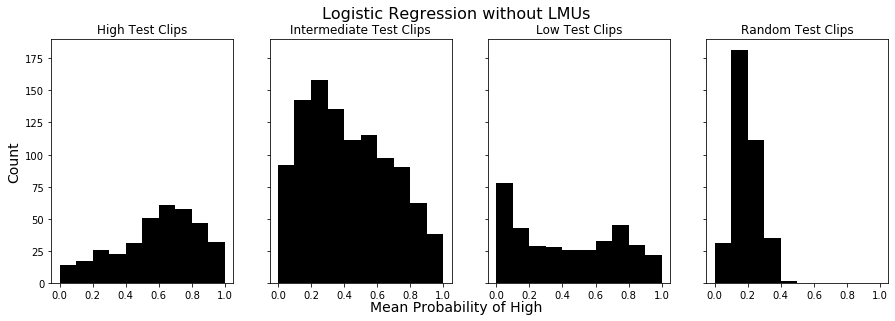

In [20]:
#Plot the mean probability that each test clip would be 
#classed as Noplay across all 20 experiments
bins=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

#plot histograms - x-axis = mean prediction probability, y-axis = count
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, sharex=True, figsize=(15, 4.5))
(nh, bins, plot) = ax1.hist(high_lrraw_summary[:,0], bins=bins, color='black')
ax1.title.set_text('High Test Clips')
ax1.set_ylabel('Count', fontsize=14)
(nm, bins, plot) = ax2.hist(mid_lrraw_summary[:,0], bins=bins, color='black')
ax2.title.set_text('Intermediate Test Clips')
(nl, bins, plot) = ax3.hist(low_lrraw_summary[:,0], bins=bins, color='black')
ax3.title.set_text('Low Test Clips')
ax4.hist(random_lrraw_summary[:,0], bins=bins, color='black')
ax4.title.set_text('Random Test Clips')

n_int = nm[1]+nm[2]+nm[3]+nm[4]+nm[5]+nm[6]+nm[7]+nm[8]
lrrhigh_cor = (nh[9]/len(high_lrraw_summary))*100
lrrmid_cor = (n_int/len(mid_lrraw_summary))*100
lrrlow_cor = (nl[0]/len(low_lrraw_summary))*100

fig.suptitle('Logistic Regression without LMUs', fontsize=16)
fig.text(0.5, 0.04, 'Mean Probability of High', ha='center', fontsize=14)
fig.savefig('lrraw_clip_hist.png')

## Logistic Regression With LMUs

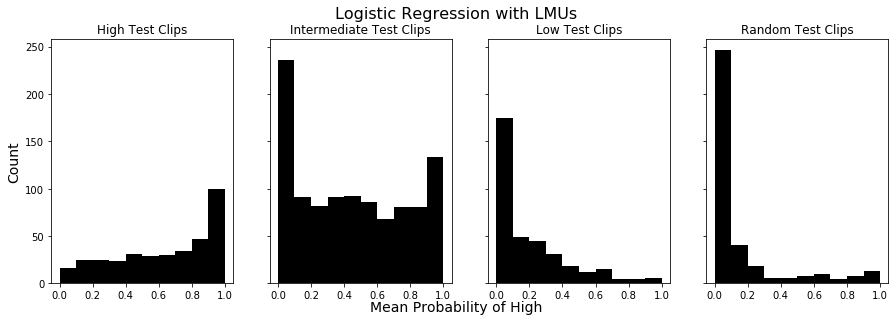

In [21]:
#Plot the mean probability that each test clip would be 
#classed as Noplay across all 20 experiments
bins=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

#plot histograms - x-axis = mean prediction probability, y-axis = count
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, sharex=True, figsize=(15, 4.5))
(nh, bins, plot) = ax1.hist(high_lrlmu_summary[:,0], bins=bins, color='black')
ax1.title.set_text('High Test Clips')
ax1.set_ylabel('Count', fontsize=14)
(nm, bins, plot) = ax2.hist(mid_lrlmu_summary[:,0], bins=bins, color='black')
ax2.title.set_text('Intermediate Test Clips')
(nl, bins, plot) = ax3.hist(low_lrlmu_summary[:,0], bins=bins, color='black')
ax3.title.set_text('Low Test Clips')
ax4.hist(random_lrlmu_summary[:,0], bins=bins, color='black')
ax4.title.set_text('Random Test Clips')

n_int = nm[1]+nm[2]+nm[3]+nm[4]+nm[5]+nm[6]+nm[7]+nm[8]
lrlhigh_cor = (nh[9]/len(high_lrlmu_summary))*100
lrlmid_cor = (n_int/len(mid_lrlmu_summary))*100
lrllow_cor = (nl[0]/len(low_lrlmu_summary))*100

fig.suptitle('Logistic Regression with LMUs', fontsize=16)
fig.text(0.5, 0.04, 'Mean Probability of High', ha='center', fontsize=14)
fig.savefig('lrlmu_clip_hist.png')

## MLP Without LMUs

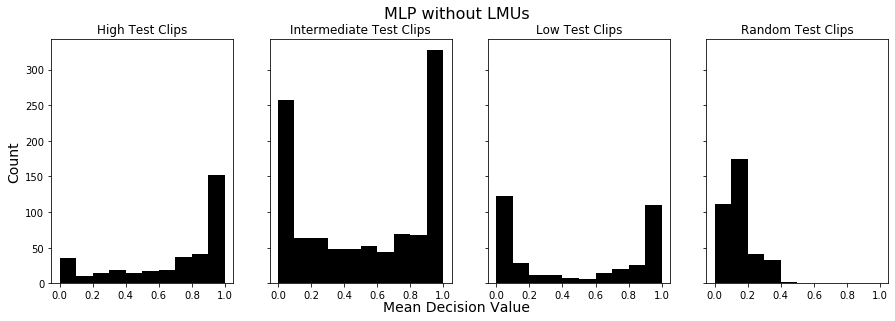

In [22]:
#Plot the mean decision value for each clip
bins=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

#plot histograms - x-axis = mean decision value, y-axis = count
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, sharex=True, figsize=(15, 4.5))
(nh, bins, plot) = ax1.hist(high_mlpraw_summary[:,0], bins=bins, color='black')
ax1.title.set_text('High Test Clips')
ax1.set_ylabel('Count', fontsize=14)
(nm, bins, plot) = ax2.hist(mid_mlpraw_summary[:,0], bins=bins, color='black')
ax2.title.set_text('Intermediate Test Clips')
(nl, bins, plot) = ax3.hist(low_mlpraw_summary[:,0], bins=bins, color='black')
ax3.title.set_text('Low Test Clips')
ax4.hist(random_mlpraw_summary[:,0], bins=bins, color='black')
ax4.title.set_text('Random Test Clips')

n_int = nm[1]+nm[2]+nm[3]+nm[4]+nm[5]+nm[6]+nm[7]+nm[8]
mlprhigh_cor = (nh[9]/len(high_mlpraw_summary))*100
mlprmid_cor = (n_int/len(mid_mlpraw_summary))*100
mlprlow_cor = (nl[0]/len(low_mlpraw_summary))*100

fig.suptitle('MLP without LMUs', fontsize=16)
fig.text(0.5, 0.04, 'Mean Decision Value', ha='center', fontsize=14)
fig.savefig('mlpraw_clip_hist.png')

## MLP With LMUs

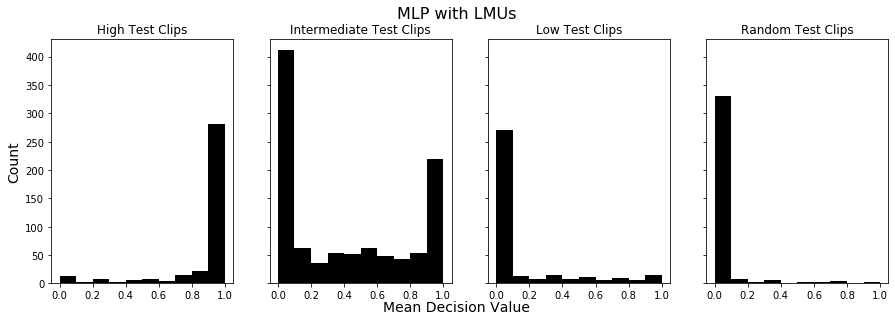

In [23]:
#Plot the mean decision value for each clip
bins=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

#plot histograms - x-axis = mean decision value, y-axis = count
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, sharex=True, figsize=(15, 4.5))
(nh, bins, plot) = ax1.hist(high_mlplmu_summary[:,0], bins=bins, color='black')
ax1.title.set_text('High Test Clips')
ax1.set_ylabel('Count', fontsize=14)
(nm, bins, plot) = ax2.hist(mid_mlplmu_summary[:,0], bins=bins, color='black')
ax2.title.set_text('Intermediate Test Clips')
(nl, bins, plot) = ax3.hist(low_mlplmu_summary[:,0], bins=bins, color='black')
ax3.title.set_text('Low Test Clips')
ax4.hist(random_mlplmu_summary[:,0], bins=bins, color='black')
ax4.title.set_text('Random Test Clips')

n_int = nm[1]+nm[2]+nm[3]+nm[4]+nm[5]+nm[6]+nm[7]+nm[8]
mlplhigh_cor = (nh[9]/len(high_mlplmu_summary))*100
mlplmid_cor = (n_int/len(mid_mlplmu_summary))*100
mlpllow_cor = (nl[0]/len(low_mlplmu_summary))*100

fig.suptitle('MLP with LMUs', fontsize=16)
fig.text(0.5, 0.04, 'Mean Decision Value', ha='center', fontsize=14)
fig.savefig('mlplmu_clip_hist.png')

## Percent Correct

Logistic Regression without LMUs

In [24]:
high_counts=[]
start=0
end=18
for j in range(20):
    (nh, bins, plot) = ax1.hist(np.vstack(high_lrraw_summary[start:end,0]), bins=bins)
    high_counts.append(nh)
    end+=18
    start+=18
        
mid_counts=[]
start=0
end=52
for j in range(20):
    (nm, bins, plot) = ax1.hist(np.vstack(mid_lrraw_summary[start:end,0]), bins=bins)
    mid_counts.append(nm)
    end+=52
    start+=52
    
low_counts=[]
start=0
end=18
for j in range(20):
    (nl, bins, plot) = ax1.hist(np.vstack(low_lrraw_summary[start:end,0]), bins=bins)
    low_counts.append(nl)
    end+=18
    start+=18

In [25]:
high_cor = [item[9] for item in high_counts] #no. high clips classified correctly in each experiment
high_len = [sum(item) for item in high_counts] #no. high clips total in each experiment (18)

mid_cor = [(item[1]+item[2]+item[3]+item[4]+item[5]+item[6]+item[7]+item[8]) for item in mid_counts] #no. mid clips classified correctly in each experiment
mid_len = [sum(item) for item in mid_counts] #no. mid clips total in each experiment (52)

low_cor = [item[0] for item in low_counts] #no. low clips classified correctly in each experiment
low_len = [sum(item) for item in low_counts] #no. low clips total in each experiment (18)

#Calculate percent correct in each experiment for each class (3 lists of 20 percentages)
high_percent=[]
mid_percent=[]
low_percent=[]
lrr_percentcorrect=[]
for i in range(20):
    high_percent.append((high_cor[i]/high_len[i])*100)
    mid_percent.append((mid_cor[i]/mid_len[i])*100)
    low_percent.append((low_cor[i]/low_len[i])*100)
    lrr_percentcorrect.append((high_cor[i]+low_cor[i])/(high_len[i]+low_len[i]))
    
high_percent=np.asarray(high_percent)
mid_percent=np.asarray(mid_percent)
low_percent=np.asarray(low_percent)

#Calculate mean percent correct and standard deviation for each clip type
lrrhigh_cor_mean=high_percent.mean()
lrrhigh_cor_sd=high_percent.std()
lrrmid_cor_mean=mid_percent.mean()
lrrmid_cor_sd=mid_percent.std()
lrrlow_cor_mean=low_percent.mean()
lrrlow_cor_sd=low_percent.std()

Logistic Regression with LMUs

In [26]:
high_counts=[]
start=0
end=18
for j in range(20):
    (nh, bins, plot) = ax1.hist(np.vstack(high_lrlmu_summary[start:end,0]), bins=bins)
    high_counts.append(nh)
    end+=18
    start+=18
        
mid_counts=[]
start=0
end=52
for j in range(20):
    (nm, bins, plot) = ax1.hist(np.vstack(mid_lrlmu_summary[start:end,0]), bins=bins)
    mid_counts.append(nm)
    end+=52
    start+=52
    
low_counts=[]
start=0
end=18
for j in range(20):
    (nl, bins, plot) = ax1.hist(np.vstack(low_lrlmu_summary[start:end,0]), bins=bins)
    low_counts.append(nl)
    end+=18
    start+=18

In [27]:
high_cor = [item[9] for item in high_counts] #no. high clips classified correctly in each experiment
high_len = [sum(item) for item in high_counts] #no. high clips total in each experiment (18)

mid_cor = [(item[1]+item[2]+item[3]+item[4]+item[5]+item[6]+item[7]+item[8]) for item in mid_counts] #no. mid clips classified correctly in each experiment
mid_len = [sum(item) for item in mid_counts] #no. mid clips total in each experiment (52)

low_cor = [item[0] for item in low_counts] #no. low clips classified correctly in each experiment
low_len = [sum(item) for item in low_counts] #no. low clips total in each experiment (18)

#Calculate percent correct in each experiment for each class (3 lists of 20 percentages)
high_percent=[]
mid_percent=[]
low_percent=[]
lrl_percentcorrect=[]
for i in range(20):
    high_percent.append((high_cor[i]/high_len[i])*100)
    mid_percent.append((mid_cor[i]/mid_len[i])*100)
    low_percent.append((low_cor[i]/low_len[i])*100)
    lrl_percentcorrect.append((high_cor[i]+low_cor[i])/(high_len[i]+low_len[i]))
    
high_percent=np.asarray(high_percent)
mid_percent=np.asarray(mid_percent)
low_percent=np.asarray(low_percent)

#Calculate mean percent correct and standard deviation for each clip type
lrlmuhigh_cor_mean=high_percent.mean()
lrlmuhigh_cor_sd=high_percent.std()
lrlmumid_cor_mean=mid_percent.mean()
lrlmumid_cor_sd=mid_percent.std()
lrlmulow_cor_mean=low_percent.mean()
lrlmulow_cor_sd=low_percent.std()

MLP without LMUs

In [28]:
high_counts=[]
start=0
end=18
for j in range(20):
    (nh, bins, plot) = ax1.hist(np.vstack(high_mlpraw_summary[start:end,0]), bins=bins)
    high_counts.append(nh)
    end+=18
    start+=18
        
mid_counts=[]
start=0
end=52
for j in range(20):
    (nm, bins, plot) = ax1.hist(np.vstack(mid_mlpraw_summary[start:end,0]), bins=bins)
    mid_counts.append(nm)
    end+=52
    start+=52
    
low_counts=[]
start=0
end=18
for j in range(20):
    (nl, bins, plot) = ax1.hist(np.vstack(low_mlpraw_summary[start:end,0]), bins=bins)
    low_counts.append(nl)
    end+=18
    start+=18

In [29]:
high_cor = [item[9] for item in high_counts] #no. high clips classified correctly in each experiment
high_len = [sum(item) for item in high_counts] #no. high clips total in each experiment (18)

mid_cor = [(item[1]+item[2]+item[3]+item[4]+item[5]+item[6]+item[7]+item[8]) for item in mid_counts] #no. mid clips classified correctly in each experiment
mid_len = [sum(item) for item in mid_counts] #no. mid clips total in each experiment (52)

low_cor = [item[0] for item in low_counts] #no. low clips classified correctly in each experiment
low_len = [sum(item) for item in low_counts] #no. low clips total in each experiment (18)

#Calculate percent correct in each experiment for each class (3 lists of 20 percentages)
high_percent=[]
mid_percent=[]
low_percent=[]
mlpr_percentcorrect=[]
for i in range(20):
    high_percent.append((high_cor[i]/high_len[i])*100)
    mid_percent.append((mid_cor[i]/mid_len[i])*100)
    low_percent.append((low_cor[i]/low_len[i])*100)
    mlpr_percentcorrect.append((high_cor[i]+low_cor[i])/(high_len[i]+low_len[i]))
    
high_percent=np.asarray(high_percent)
mid_percent=np.asarray(mid_percent)
low_percent=np.asarray(low_percent)

#Calculate mean percent correct and standard deviation for each clip type
mlprhigh_cor_mean=high_percent.mean()
mlprhigh_cor_sd=high_percent.std()
mlprmid_cor_mean=mid_percent.mean()
mlprmid_cor_sd=mid_percent.std()
mlprlow_cor_mean=low_percent.mean()
mlprlow_cor_sd=low_percent.std()

MLP with LMUs

In [30]:
high_counts=[]
start=0
end=18
for j in range(20):
    (nh, bins, plot) = ax1.hist(np.vstack(high_mlplmu_summary[start:end,0]), bins=bins)
    high_counts.append(nh)
    end+=18
    start+=18
        
mid_counts=[]
start=0
end=52
for j in range(20):
    (nm, bins, plot) = ax1.hist(np.vstack(mid_mlplmu_summary[start:end,0]), bins=bins)
    mid_counts.append(nm)
    end+=52
    start+=52
    
low_counts=[]
start=0
end=18
for j in range(20):
    (nl, bins, plot) = ax1.hist(np.vstack(low_mlplmu_summary[start:end,0]), bins=bins)
    low_counts.append(nl)
    end+=18
    start+=18

In [31]:
high_cor = [item[9] for item in high_counts] #no. high clips classified correctly in each experiment
high_len = [sum(item) for item in high_counts] #no. high clips total in each experiment (18)

mid_cor = [(item[1]+item[2]+item[3]+item[4]+item[5]+item[6]+item[7]+item[8]) for item in mid_counts] #no. mid clips classified correctly in each experiment
mid_len = [sum(item) for item in mid_counts] #no. mid clips total in each experiment (52)

low_cor = [item[0] for item in low_counts] #no. low clips classified correctly in each experiment
low_len = [sum(item) for item in low_counts] #no. low clips total in each experiment (18)

#Calculate percent correct in each experiment for each class (3 lists of 20 percentages)
high_percent=[]
mid_percent=[]
low_percent=[]
mlpl_percentcorrect=[]
for i in range(20):
    high_percent.append((high_cor[i]/high_len[i])*100)
    mid_percent.append((mid_cor[i]/mid_len[i])*100)
    low_percent.append((low_cor[i]/low_len[i])*100)
    mlpl_percentcorrect.append((high_cor[i]+low_cor[i])/(high_len[i]+low_len[i]))
    
high_percent=np.asarray(high_percent)
mid_percent=np.asarray(mid_percent)
low_percent=np.asarray(low_percent)

#Calculate mean percent correct and standard deviation for each clip type
mlplmuhigh_cor_mean=high_percent.mean()
mlplmuhigh_cor_sd=high_percent.std()
mlplmumid_cor_mean=mid_percent.mean()
mlplmumid_cor_sd=mid_percent.std()
mlplmulow_cor_mean=low_percent.mean()
mlplmulow_cor_sd=low_percent.std()

In [32]:
Percent_Correct_Clips = pd.DataFrame({'LR w/o LMU M(SD)': [f'{lrrhigh_cor_mean:.2f}'+'%'+' ('+f'{lrrhigh_cor_sd:.2f}'+')',
                                                  f'{lrrmid_cor_mean:.2f}'+'%'+' ('+f'{lrrmid_cor_sd:.2f}'+')',
                                                  f'{lrrlow_cor_mean:.2f}'+'%'+' ('+f'{lrrlow_cor_sd:.2f}'+')'],
                                'LR with LMU M(SD)': [f'{lrlmuhigh_cor_mean:.2f}'+'%'+' ('+f'{lrlmuhigh_cor_sd:.2f}'+')',
                                                  f'{lrlmumid_cor_mean:.2f}'+'%'+' ('+f'{lrlmumid_cor_sd:.2f}'+')',
                                                  f'{lrlmulow_cor_mean:.2f}'+'%'+' ('+f'{lrlmulow_cor_sd:.2f}'+')'],
                                'MLP w/o LMU M(SD)': [f'{mlprhigh_cor_mean:.2f}'+'%'+' ('+f'{mlprhigh_cor_sd:.2f}'+')',
                                                  f'{mlprmid_cor_mean:.2f}'+'%'+' ('+f'{mlprmid_cor_sd:.2f}'+')',
                                                  f'{mlprlow_cor_mean:.2f}'+'%'+' ('+f'{mlprlow_cor_sd:.2f}'+')'],
                                'MLP with LMU M(SD)': [f'{mlplmuhigh_cor_mean:.2f}'+'%'+' ('+f'{mlplmuhigh_cor_sd:.2f}'+')',
                                                  f'{mlplmumid_cor_mean:.2f}'+'%'+' ('+f'{mlplmumid_cor_sd:.2f}'+')',
                                                  f'{mlplmulow_cor_mean:.2f}'+'%'+' ('+f'{mlplmulow_cor_sd:.2f}'+')']})

Percent_Correct_Clips.set_index([pd.Index(['High Engagement', 'Intermediate Engagement', 'Low Engagement'])])

,LR w/o LMU M(SD),LR with LMU M(SD),MLP w/o LMU M(SD),MLP with LMU M(SD)
High Engagement,8.89% (7.93),27.78% (8.78),42.22% (16.70),78.06% (10.46)
Intermediate Engagement,87.50% (4.77),64.52% (5.03),43.85% (6.25),39.33% (3.87)
Low Engagement,21.67% (10.96),48.61% (9.92),34.17% (15.04),75.00% (10.17)


# Classifier Output across Clip Timeline

## Just the First Experiment

Logistic Regression without LMUs

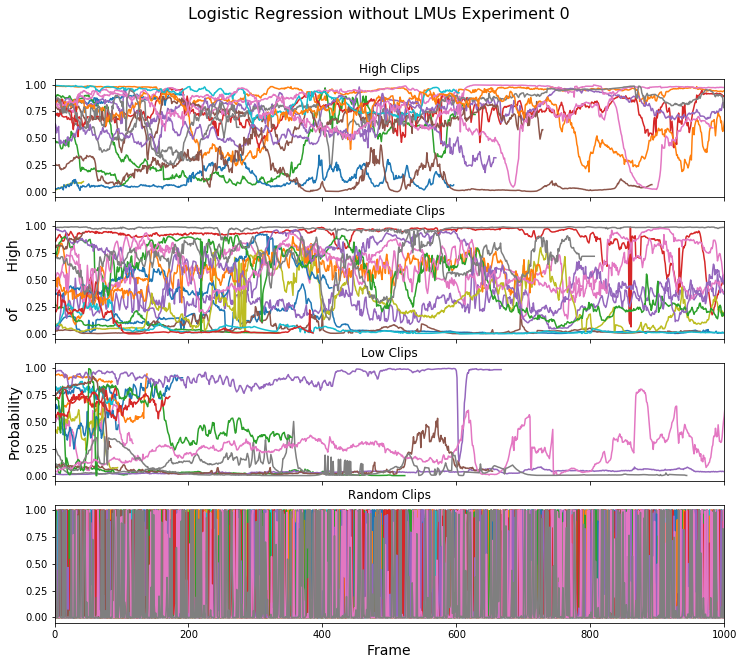

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharey=True, sharex=True, figsize=(12, 10))
for i in range(18): # for each clip plot 1 line
    a=lrraw_clip.iloc[0]['prediction_prob_high'][i]
    ax1.plot(a[:,1])
    ax1.set_xlim(0,1000)
    ax1.title.set_text('High Clips')

    b=lrraw_clip.iloc[0]['prediction_prob_mid'][i]
    ax2.plot(b[:,1])
    ax2.set_xlim(0,1000)
    ax2.set_ylabel('of        High', fontsize=14)
    ax2.title.set_text('Intermediate Clips')

    c=lrraw_clip.iloc[0]['prediction_prob_low'][i]
    ax3.plot(c[:,1])
    ax3.set_xlim(0,1000)
    ax3.set_ylabel('Probability', fontsize=14)
    ax3.title.set_text('Low Clips')

    d=lrraw_clip.iloc[0]['prediction_prob_random'][i]
    ax4.plot(d[:,1])
    ax4.set_xlim(0,1000)
    ax4.set_xlabel('Frame', fontsize=14)
    ax4.title.set_text('Random Clips')

    fig.suptitle('Logistic Regression without LMUs Experiment 0', fontsize=16)
    fig.savefig('lrraw_cliptimeline.png')

Logistic Regression with LMus

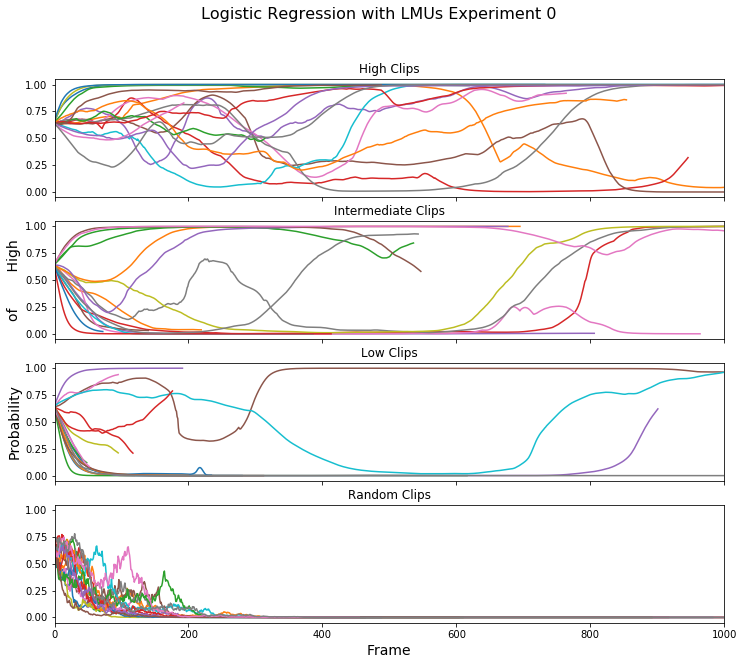

In [34]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharey=True, sharex=True, figsize=(12, 10))
for i in range(18): # for each clip plot 1 line
    a=lrlmu_clip.iloc[0]['prediction_prob_high'][i]
    ax1.plot(a[:,1])
    ax1.set_xlim(0,1000)
    ax1.title.set_text('High Clips')

    b=lrlmu_clip.iloc[0]['prediction_prob_mid'][i]
    ax2.plot(b[:,1])
    ax2.set_xlim(0,1000)
    ax2.set_ylabel('of        High', fontsize=14)
    ax2.title.set_text('Intermediate Clips')

    c=lrlmu_clip.iloc[0]['prediction_prob_low'][i]
    ax3.plot(c[:,1])
    ax3.set_xlim(0,1000)
    ax3.set_ylabel('Probability', fontsize=14)
    ax3.title.set_text('Low Clips')

    d=lrlmu_clip.iloc[0]['prediction_prob_random'][i]
    ax4.plot(d[:,1])
    ax4.set_xlim(0,1000)
    ax4.set_xlabel('Frame', fontsize=14)
    ax4.title.set_text('Random Clips')
    
    fig.suptitle('Logistic Regression with LMUs Experiment 0', fontsize=16)
    fig.savefig('lrlmu_cliptimeline.png')

MLP without LMUs

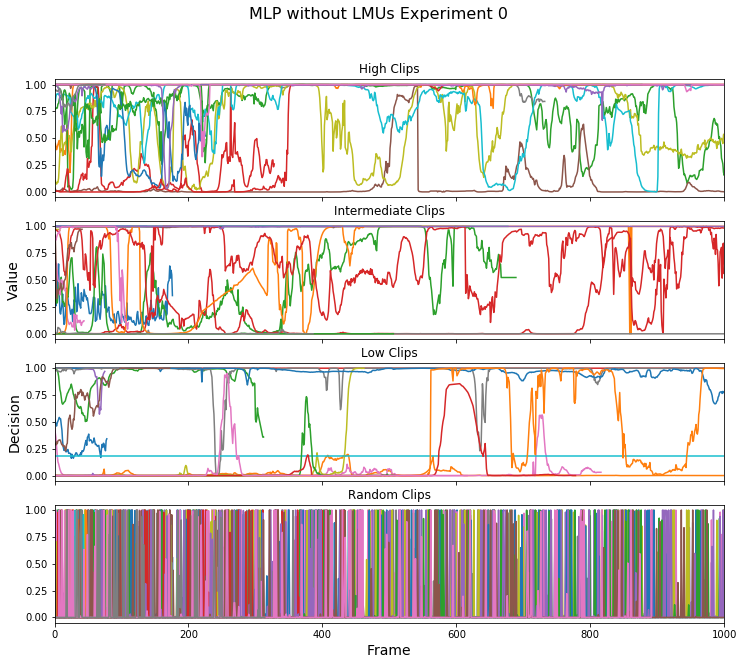

In [35]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharey=True, sharex=True, figsize=(12, 10))
for i in range(18): # for each clip plot 1 line
    a=mlpraw_clip.iloc[0]['decision_high'][i]
    ax1.plot(a[:,0])
    ax1.set_xlim(0,1000)
    ax1.title.set_text('High Clips')

    b=mlpraw_clip.iloc[0]['decision_mid'][i]
    ax2.plot(b[:,0])
    ax2.set_xlim(0,1000)
    ax2.set_ylabel('Value', fontsize=14)
    ax2.title.set_text('Intermediate Clips')

    c=mlpraw_clip.iloc[0]['decision_low'][i]
    ax3.plot(c[:,0])
    ax3.set_xlim(0,1000)
    ax3.set_ylabel('Decision', fontsize=14)
    ax3.title.set_text('Low Clips')

    d=mlpraw_clip.iloc[0]['decision_random'][i]
    ax4.plot(d[:,0])
    ax4.set_xlim(0,1000)
    ax4.set_xlabel('Frame', fontsize=14)
    ax4.title.set_text('Random Clips')
    
    fig.suptitle('MLP without LMUs Experiment 0', fontsize=16)
    fig.savefig('mlpraw_cliptimeline.png')

MLP with LMUs

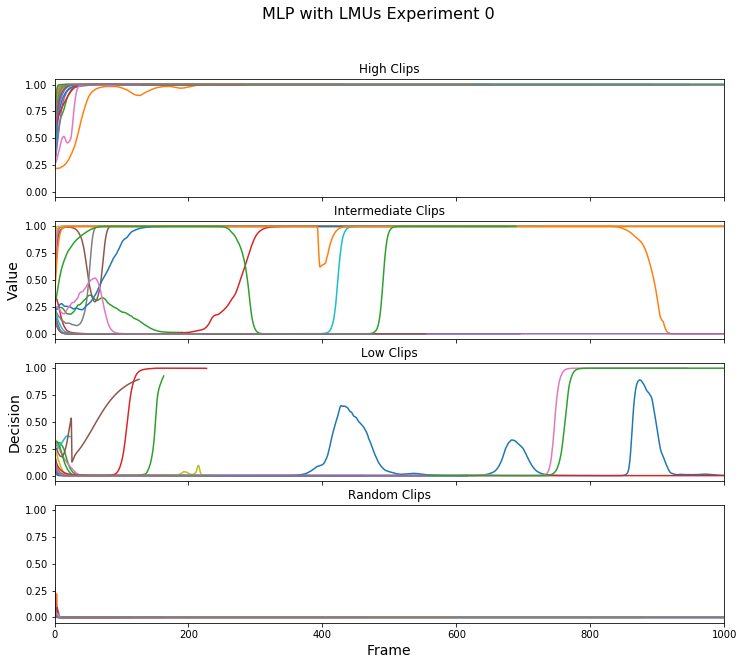

In [36]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharey=True, sharex=True, figsize=(12, 10))
for i in range(18): # for each clip plot 1 line
    a=mlplmu_clip.iloc[0]['decision_high'][i]
    ax1.plot(a[:,0])
    ax1.set_xlim(0,1000)
    ax1.title.set_text('High Clips')

    b=mlplmu_clip.iloc[0]['decision_mid'][i]
    ax2.plot(b[:,0])
    ax2.set_xlim(0,1000)
    ax2.set_ylabel('Value', fontsize=14)
    ax2.title.set_text('Intermediate Clips')

    c=mlplmu_clip.iloc[0]['decision_low'][i]
    ax3.plot(c[:,0])
    ax3.set_xlim(0,1000)
    ax3.set_ylabel('Decision', fontsize=14)
    ax3.title.set_text('Low Clips')

    d=mlplmu_clip.iloc[0]['decision_random'][i]
    ax4.plot(d[:,0])
    ax4.set_xlim(0,1000)
    ax4.set_xlabel('Frame', fontsize=14)
    ax4.title.set_text('Random Clips')
    
    fig.suptitle('MLP with LMUs Experiment 0', fontsize=16)
    fig.savefig('mlplmu_cliptimeline.png')

## Was there a Significant Effect of Classifier and Pre-Processing on Clip-wise Classification Success?

2-way ANOVA with classifier (Logistic Regression vs. MLP) and Pre-processing (with vs. without LMU) <br>
Dependent Variable (outcome) = percent of high and low engagement clips classified correctly in each experiment. <br>
Independent Variables = classifier and pre-processing step

### Assumption Checks

In [37]:
lrr_percentcorrect=pd.DataFrame(lrr_percentcorrect)
lrr_percentcorrect['classifier']='classifier1'
lrr_percentcorrect['preprocess']='preprocess1'

lrl_percentcorrect=pd.DataFrame(lrl_percentcorrect)
lrl_percentcorrect['classifier']='classifier1'
lrl_percentcorrect['preprocess']='preprocess2'

mlpr_percentcorrect=pd.DataFrame(mlpr_percentcorrect)
mlpr_percentcorrect['classifier']='classifier2'
mlpr_percentcorrect['preprocess']='preprocess1'

mlpl_percentcorrect=pd.DataFrame(mlpl_percentcorrect)
mlpl_percentcorrect['classifier']='classifier2'
mlpl_percentcorrect['preprocess']='preprocess2'

In [38]:
stacked_data=lrr_percentcorrect.append(lrl_percentcorrect)
stacked_data=stacked_data.append(mlpr_percentcorrect)
stacked_data=stacked_data.append(mlpl_percentcorrect)

stacked_data = stacked_data.rename(columns={0:'result'})

Create model

In [39]:
results = ols('result ~ classifier*preprocess', stacked_data).fit()

### Assumption Checks

Shapiro's test for normality - testing the residuals. If not significant the residuals are normally distributed.

In [40]:
stats.shapiro(results.resid)

(0.9827147722244263, 0.35397347807884216)

Bartlett's test for equal variances between groups. If not significant the groups have equal variances.

In [41]:
stats.bartlett(stacked_data['result'][(stacked_data['classifier'] == 'classifier1') & (stacked_data['preprocess'] == 'preprocess1')],
             stacked_data['result'][(stacked_data['classifier'] == 'classifier1') & (stacked_data['preprocess'] == 'preprocess2')],
             stacked_data['result'][(stacked_data['classifier'] == 'classifier2') & (stacked_data['preprocess'] == 'preprocess1')],
             stacked_data['result'][(stacked_data['classifier'] == 'classifier2') & (stacked_data['preprocess'] == 'preprocess2')])

BartlettResult(statistic=0.9902999305690166, pvalue=0.8035990712359107)

### Two-Way ANOVA

In [42]:
rp.summary_cont(stacked_data.groupby(['classifier']))['result']

,N,Mean,SD,SE,95% Conf.,Interval
classifier,,,,,,
classifier1,40,0.267361,0.134428,0.021255,0.225701,0.309021
classifier2,40,0.573611,0.205722,0.032528,0.509857,0.637365


In [43]:
rp.summary_cont(stacked_data.groupby(['preprocess']))['result']

,N,Mean,SD,SE,95% Conf.,Interval
preprocess,,,,,,
preprocess1,40,0.267361,0.134722,0.021301,0.225610,0.309112
preprocess2,40,0.573611,0.205530,0.032497,0.509917,0.637305


In [44]:
rp.summary_cont(stacked_data.groupby(['classifier', 'preprocess']))['result']

N      Mean        SD        SE  95% Conf.  Interval
classifier  preprocess                                                        
classifier1 preprocess1  20  0.152778  0.063407  0.014178   0.124988  0.180567
            preprocess2  20  0.381944  0.073700  0.016480   0.349644  0.414245
classifier2 preprocess1  20  0.381944  0.074794  0.016724   0.349165  0.414724
            preprocess2  20  0.765278  0.062747  0.014031   0.737778  0.792778

In [45]:
aov_table = sm.stats.anova_lm(results, typ=2)

def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']
    
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
    
    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

anova_table(aov_table)

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
classifier,1.875781,1.0,1.875781,395.244304,7.669991e-32,0.443333,0.441716
preprocess,1.875781,1.0,1.875781,395.244304,7.669991e-32,0.443333,0.441716
classifier:preprocess,0.118837,1.0,0.118837,25.040004,3.529114e-06,0.028087,0.026935
Residual,0.360687,76.0,0.004746,NaN,NaN,NaN,NaN


Pairwise Comparisons using Tukey's HSD <br>
A results of ’reject = True’ means that a significant difference has been observed.

In [46]:
mc = statsmodels.stats.multicomp.MultiComparison(stacked_data['result'], stacked_data['classifier'])
mc_results = mc.tukeyhsd()
print(mc_results)

  Multiple Comparison of Means - Tukey HSD,FWER=0.05 
   group1      group2   meandiff lower  upper  reject
-----------------------------------------------------
classifier1 classifier2  0.3062  0.2289 0.3836  True 
-----------------------------------------------------


In [47]:
mc = statsmodels.stats.multicomp.MultiComparison(stacked_data['result'], stacked_data['preprocess'])
mc_results = mc.tukeyhsd()
print(mc_results)

  Multiple Comparison of Means - Tukey HSD,FWER=0.05 
   group1      group2   meandiff lower  upper  reject
-----------------------------------------------------
preprocess1 preprocess2  0.3062  0.2289 0.3836  True 
-----------------------------------------------------


# Cluster Plots of Summary Statistics for each Class

## Logistic Regression Without LMUs

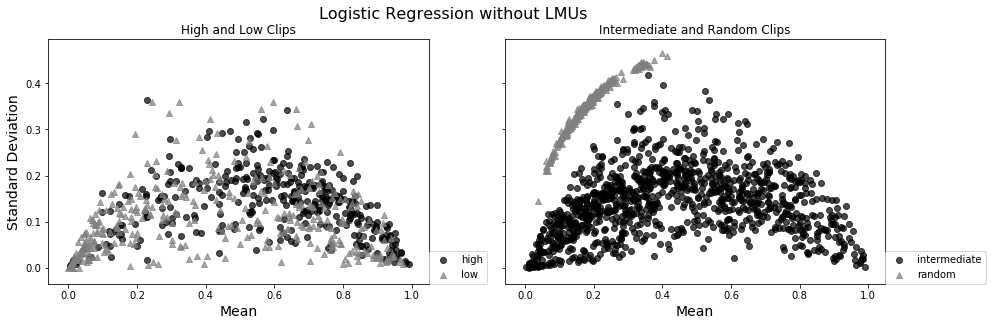

In [48]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(15, 4.5))
ax1.scatter(high_lrraw_summary[:,0],high_lrraw_summary[:,1], alpha=0.7, color='black', label='high')
ax1.scatter(low_lrraw_summary[:,0],low_lrraw_summary[:,1], alpha=0.7, color='grey', label='low', marker='^')
ax1.set_xlabel('Mean', fontsize=14)
ax1.set_ylabel('Standard Deviation', fontsize=14)
ax1.legend(loc=(1,0))
ax1.title.set_text('High and Low Clips')

ax2.scatter(mid_lrraw_summary[:,0],mid_lrraw_summary[:,1], alpha=0.7, color='black', label='intermediate')
ax2.scatter(random_lrraw_summary[:,0],random_lrraw_summary[:,1], alpha=0.7, color='grey', label='random', marker='^')
ax2.set_xlabel('Mean', fontsize=14)
ax2.legend(loc=(1,0))
ax2.title.set_text('Intermediate and Random Clips')

fig.suptitle('Logistic Regression without LMUs', fontsize=16)
fig.savefig('lrraw_cluster.png')

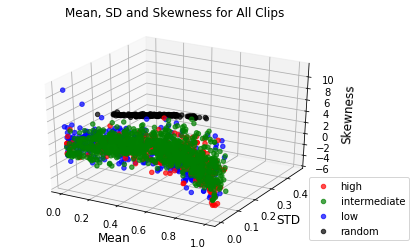

In [49]:
ax = plt.axes(projection='3d')
ax.scatter(high_lrraw_summary[:,0],high_lrraw_summary[:,1],high_lrraw_summary[:,2], alpha=0.7, color='red', label='high')
ax.scatter(mid_lrraw_summary[:,0],mid_lrraw_summary[:,1],mid_lrraw_summary[:,2], alpha=0.7, color='green', label='intermediate')
ax.scatter(low_lrraw_summary[:,0],low_lrraw_summary[:,1],low_lrraw_summary[:,2], alpha=0.7, color='blue', label='low')
ax.scatter(random_lrraw_summary[:,0],random_lrraw_summary[:,1],random_lrraw_summary[:,2], alpha=0.7, color='black', label='random')
ax.set_ylabel('STD', fontsize=12)
ax.set_xlabel('Mean', fontsize=12)
ax.set_zlabel('Skewness', fontsize=12)
ax.legend(loc=(0.9,0))
ax.title.set_text('Mean, SD and Skewness for All Clips')

Multilabel Logistic Regression <br>
How well can we (linearly) separate clip classes based on summary statistics? <br>

**Note:** Here we're using the means, sds, skewness and kurtosis scores for each clip. 

## Logistic Regression With LMUs

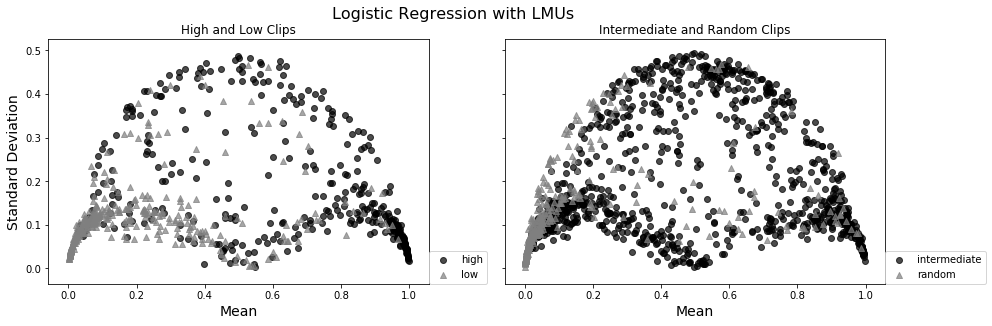

In [50]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(15, 4.5))
ax1.scatter(high_lrlmu_summary[:,0], high_lrlmu_summary[:,1], alpha=0.7, color='black', label='high')
ax1.scatter(low_lrlmu_summary[:,0], low_lrlmu_summary[:,1], alpha=0.7, color='grey', label='low', marker='^')
ax1.set_xlabel('Mean', fontsize=14)
ax1.set_ylabel('Standard Deviation', fontsize=14)
ax1.legend(loc=(1,0))
ax1.title.set_text('High and Low Clips')

ax2.scatter(mid_lrlmu_summary[:,0], mid_lrlmu_summary[:,1], alpha=0.7, color='black', label='intermediate')
ax2.scatter(random_lrlmu_summary[:,0],random_lrlmu_summary[:,1], alpha=0.7, color='grey', label='random', marker='^')
ax2.set_xlabel('Mean', fontsize=14)
ax2.legend(loc=(1,0))
ax2.title.set_text('Intermediate and Random Clips')

fig.suptitle('Logistic Regression with LMUs', fontsize=16)
fig.savefig('lrlmu_cluster.png')

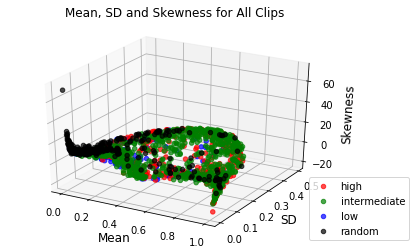

In [51]:
ax = plt.axes(projection='3d')
ax.scatter(high_lrlmu_summary[:,0],high_lrlmu_summary[:,1],high_lrlmu_summary[:,2], alpha=0.7, color='red', label='high')
ax.scatter(mid_lrlmu_summary[:,0],mid_lrlmu_summary[:,1],mid_lrlmu_summary[:,2], alpha=0.7, color='green', label='intermediate')
ax.scatter(low_lrlmu_summary[:,0],low_lrlmu_summary[:,1],low_lrlmu_summary[:,2], alpha=0.7, color='blue', label='low')
ax.scatter(random_lrlmu_summary[:,0],random_lrlmu_summary[:,1],random_lrlmu_summary[:,2], alpha=0.7, color='black', label='random')
ax.set_ylabel('SD', fontsize=12)
ax.set_xlabel('Mean', fontsize=12)
ax.set_zlabel('Skewness', fontsize=12)
ax.legend(loc=(0.9,0))
ax.title.set_text('Mean, SD and Skewness for All Clips')

Multilabel Logistic Regression <br>
How well can we (linearly) separate clip classes based on summary statistics? <br>

## MLP Without LMUs

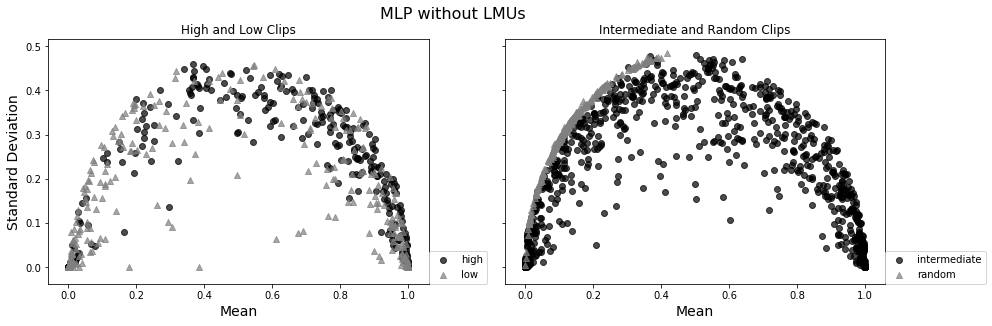

In [52]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(15, 4.5))
ax1.scatter(high_mlpraw_summary[:,0],high_mlpraw_summary[:,1], alpha=0.7, color='black', label='high')
ax1.scatter(low_mlpraw_summary[:,0],low_mlpraw_summary[:,1], alpha=0.7, color='grey', label='low', marker='^')
ax1.set_xlabel('Mean', fontsize=14)
ax1.set_ylabel('Standard Deviation', fontsize=14)
ax1.legend(loc=(1,0))
ax1.title.set_text('High and Low Clips')

ax2.scatter(mid_mlpraw_summary[:,0],mid_mlpraw_summary[:,1], alpha=0.7, color='black', label='intermediate')
ax2.scatter(random_mlpraw_summary[:,0],random_mlpraw_summary[:,1], alpha=0.7, color='grey', label='random', marker='^')
ax2.set_xlabel('Mean', fontsize=14)
ax2.legend(loc=(1,0))
ax2.title.set_text('Intermediate and Random Clips')

fig.suptitle('MLP without LMUs', fontsize=16)
fig.savefig('mlpraw_cluster.png')

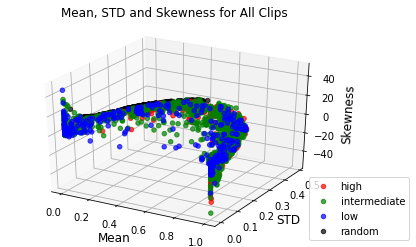

In [53]:
ax = plt.axes(projection='3d')
ax.scatter(high_mlpraw_summary[:,0],high_mlpraw_summary[:,1],high_mlpraw_summary[:,2], alpha=0.7, color='red', label='high')
ax.scatter(mid_mlpraw_summary[:,0],mid_mlpraw_summary[:,1],mid_mlpraw_summary[:,2], alpha=0.7, color='green', label='intermediate')
ax.scatter(low_mlpraw_summary[:,0],low_mlpraw_summary[:,1],low_mlpraw_summary[:,2], alpha=0.7, color='blue', label='low')
ax.scatter(random_mlpraw_summary[:,0],random_mlpraw_summary[:,1],random_mlpraw_summary[:,2], alpha=0.7, color='black', label='random')
ax.set_ylabel('STD', fontsize=12)
ax.set_xlabel('Mean', fontsize=12)
ax.set_zlabel('Skewness', fontsize=12)
ax.legend(loc=(0.9,0))
ax.title.set_text('Mean, STD and Skewness for All Clips')

Multilabel Logistic Regression <br>
How well can we (linearly) separate clip classes based on summary statistics? <br>

## MLP With LMUs

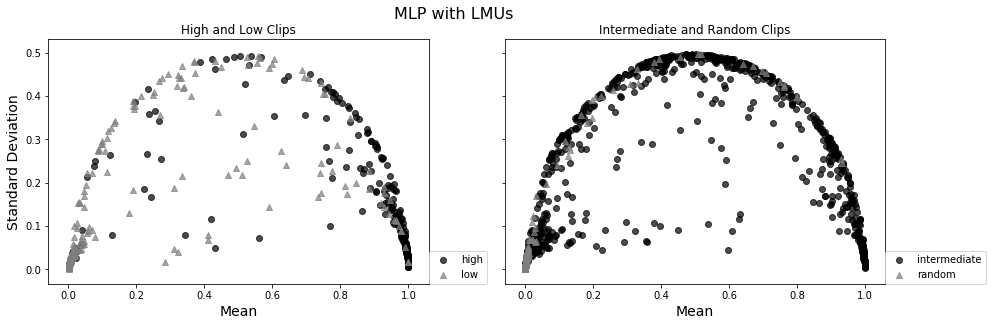

In [54]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(15, 4.5))
ax1.scatter(high_mlplmu_summary[:,0],high_mlplmu_summary[:,1], alpha=0.7, color='black', label='high')
ax1.scatter(low_mlplmu_summary[:,0],low_mlplmu_summary[:,1], alpha=0.7, color='grey', label='low', marker='^')
ax1.set_xlabel('Mean', fontsize=14)
ax1.set_ylabel('Standard Deviation', fontsize=14)
ax1.legend(loc=(1,0))
ax1.title.set_text('High and Low Clips')

ax2.scatter(mid_mlplmu_summary[:,0],mid_mlplmu_summary[:,1], alpha=0.7, color='black', label='intermediate')
ax2.scatter(random_mlplmu_summary[:,0],random_mlplmu_summary[:,1], alpha=0.7, color='grey', label='random', marker='^')
ax2.set_xlabel('Mean', fontsize=14)
ax2.legend(loc=(1,0))
ax2.title.set_text('Intermediate and Random Clips')

fig.suptitle('MLP with LMUs', fontsize=16)
fig.savefig('mlplmu_cluster.png')

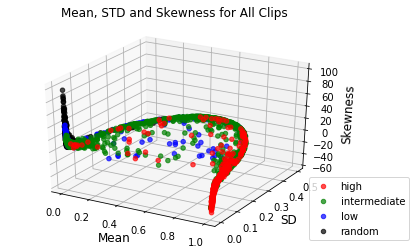

In [55]:
ax = plt.axes(projection='3d')
ax.scatter(high_mlplmu_summary[:,0],high_mlplmu_summary[:,1],high_mlplmu_summary[:,2], alpha=0.7, color='red', label='high')
ax.scatter(mid_mlplmu_summary[:,0],mid_mlplmu_summary[:,1],mid_mlplmu_summary[:,2], alpha=0.7, color='green', label='intermediate')
ax.scatter(low_mlplmu_summary[:,0],low_mlplmu_summary[:,1],low_mlplmu_summary[:,2], alpha=0.7, color='blue', label='low')
ax.scatter(random_mlplmu_summary[:,0],random_mlplmu_summary[:,1],random_mlplmu_summary[:,2], alpha=0.7, color='black', label='random')
ax.set_ylabel('SD', fontsize=12)
ax.set_xlabel('Mean', fontsize=12)
ax.set_zlabel('Skewness', fontsize=12)
ax.legend(loc=(0.9,0))
ax.title.set_text('Mean, STD and Skewness for All Clips')

Multilabel Logistic Regression <br>
How well can we (linearly) separate clip classes based on summary statistics? <br>

# KNN Random vs. Non-Random

## Logistic Regression without LMUs

First we take 18 samples from each class in each of the 20 experiments.

In [56]:
lst=[]
start=0
end=106
for i in range(20):
    exp=summaries_lrraw[start:end]
    #get random sample of 18 high, intermediate and low clips from each experiment
    sample = random.sample(list(exp[:88]),18)
    sample = np.append(sample, exp[88:106],0)  
    sample[np.where(sample =='high')]='nonrandom'
    sample[np.where(sample =='mid')]='nonrandom'
    sample[np.where(sample =='low')]='nonrandom'
    lst.append(sample)
    start+=106
    end+=106

lrraw_r_nr=np.asarray(lst)

Now run kNN (k=5) to see how well these classes cluster based on clip mean, standard deviation, skewness and kurtosis

In [57]:
lrr_scores=[]
lrr_confusion=np.zeros((20,2,2))

for i in range(20):
    X = lrraw_r_nr[i][:,:4]
    X = X.astype(np.float)
    y = lrraw_r_nr[i][:,4]
    
    #clf = LogisticRegression(solver='lbfgs', multi_class='multinomial').fit(X, y)
    clf = KNeighborsClassifier(n_neighbors=5).fit(X, y)
    lrr_scores.append(clf.score(X, y))
    y_pred=clf.predict(X)
    lrr_confusion[i]=confusion_matrix(y, y_pred, labels=['random', 'nonrandom'])
    
print('Logistic Regression using mean, sd, skewness and kurtosis as predictors.')
print('Mean Score:           ', np.asarray(lrr_scores).mean())
print('Standard Deviation:   ', np.asarray(lrr_scores).std())

Logistic Regression using mean, sd, skewness and kurtosis as predictors.
Mean Score:            0.9458333333333331
Standard Deviation:    0.036720289073339685


## Logistic Regression with LMUs

First we take 18 samples from each class in each of the 20 experiments.

In [59]:
lst=[]
start=0
end=106
for i in range(20):
    exp=summaries_lrlmu[start:end]
    #get random sample of 18 high, intermediate and low clips from each experiment
    sample = random.sample(list(exp[:88]),18)
    sample = np.append(sample, exp[88:106],0)  
    sample[np.where(sample =='high')]='nonrandom'
    sample[np.where(sample =='mid')]='nonrandom'
    sample[np.where(sample =='low')]='nonrandom'
    lst.append(sample)
    start+=106
    end+=106

lrlmu_r_nr=np.asarray(lst)

Now run kNN (k=5) to see how well these classes cluster based on clip mean, standard deviation, skewness and kurtosis

In [60]:
lrl_scores=[]
lrl_confusion=np.zeros((20,2,2))

for i in range(20):
    X = lrlmu_r_nr[i][:,:4]
    X = X.astype(np.float)
    y = lrlmu_r_nr[i][:,4]
    
    #clf = LogisticRegression(solver='lbfgs', multi_class='multinomial').fit(X, y)
    clf = KNeighborsClassifier(n_neighbors=5).fit(X, y)
    lrl_scores.append(clf.score(X, y))
    y_pred=clf.predict(X)
    lrl_confusion[i]=confusion_matrix(y, y_pred, labels=['random', 'nonrandom'])
    
print('Logistic Regression using mean, sd, skewness and kurtosis as predictors.')
print('Mean Score:           ', np.asarray(lrl_scores).mean())
print('Standard Deviation:   ', np.asarray(lrl_scores).std())

Logistic Regression using mean, sd, skewness and kurtosis as predictors.
Mean Score:            0.7722222222222221
Standard Deviation:    0.0911178859269818


## MLP without LMUs

First we take 18 samples from each class in each of the 20 experiments.

In [61]:
lst=[]
start=0
end=106
for i in range(20):
    exp=summaries_mlpraw[start:end]
    #get random sample of 18 high, intermediate and low clips from each experiment
    sample = random.sample(list(exp[:88]),18)
    sample = np.append(sample, exp[88:106],0)  
    sample[np.where(sample =='high')]='nonrandom'
    sample[np.where(sample =='mid')]='nonrandom'
    sample[np.where(sample =='low')]='nonrandom'
    lst.append(sample)
    start+=106
    end+=106

mlpraw_r_nr=np.asarray(lst)

Now run kNN (k=5) to see how well these classes cluster based on clip mean, standard deviation, skewness and kurtosis

In [62]:
mlpr_scores=[]
mlpr_confusion=np.zeros((20,2,2))

for i in range(20):
    X = mlpraw_r_nr[i][:,:4]
    X = X.astype(np.float)
    y = mlpraw_r_nr[i][:,4]
    
    #clf = LogisticRegression(solver='lbfgs', multi_class='multinomial').fit(X, y)
    clf = KNeighborsClassifier(n_neighbors=5).fit(X, y)
    mlpr_scores.append(clf.score(X, y))
    y_pred=clf.predict(X)
    mlpr_confusion[i]=confusion_matrix(y, y_pred, labels=['random', 'nonrandom'])
    
print('Logistic Regression using mean, sd, skewness and kurtosis as predictors.')
print('Mean Score:           ', np.asarray(mlpr_scores).mean())
print('Standard Deviation:   ', np.asarray(mlpr_scores).std())

Logistic Regression using mean, sd, skewness and kurtosis as predictors.
Mean Score:            0.9374999999999998
Standard Deviation:    0.038162865733428024


## MLP with LMUs

First we take 18 samples from each class in each of the 20 experiments.

In [63]:
lst=[]
start=0
end=106
for i in range(20):
    exp=summaries_mlplmu[start:end]
    #get random sample of 18 high, intermediate and low clips from each experiment
    sample = random.sample(list(exp[:88]),18)
    sample = np.append(sample, exp[88:106],0)  
    sample[np.where(sample =='high')]='nonrandom'
    sample[np.where(sample =='mid')]='nonrandom'
    sample[np.where(sample =='low')]='nonrandom'
    lst.append(sample)
    start+=106
    end+=106

mlplmu_r_nr=np.asarray(lst)

Now run kNN (k=5) to see how well these classes cluster based on clip mean, standard deviation, skewness and kurtosis

In [64]:
mlpl_scores=[]
mlpl_confusion=np.zeros((20,2,2))

for i in range(20):
    X = mlplmu_r_nr[i][:,:4]
    X = X.astype(np.float)
    y = mlplmu_r_nr[i][:,4]
    
    #clf = LogisticRegression(solver='lbfgs', multi_class='multinomial').fit(X, y)
    clf = KNeighborsClassifier(n_neighbors=5).fit(X, y)
    mlpl_scores.append(clf.score(X, y))
    y_pred=clf.predict(X)
    mlpl_confusion[i]=confusion_matrix(y, y_pred, labels=['random', 'nonrandom'])
    
print('Logistic Regression using mean, sd, skewness and kurtosis as predictors.')
print('Mean Score:           ', np.asarray(mlpl_scores).mean())
print('Standard Deviation:   ', np.asarray(mlpl_scores).std())

Logistic Regression using mean, sd, skewness and kurtosis as predictors.
Mean Score:            0.7763888888888889
Standard Deviation:    0.05588444316314089


## Confusion Matrices

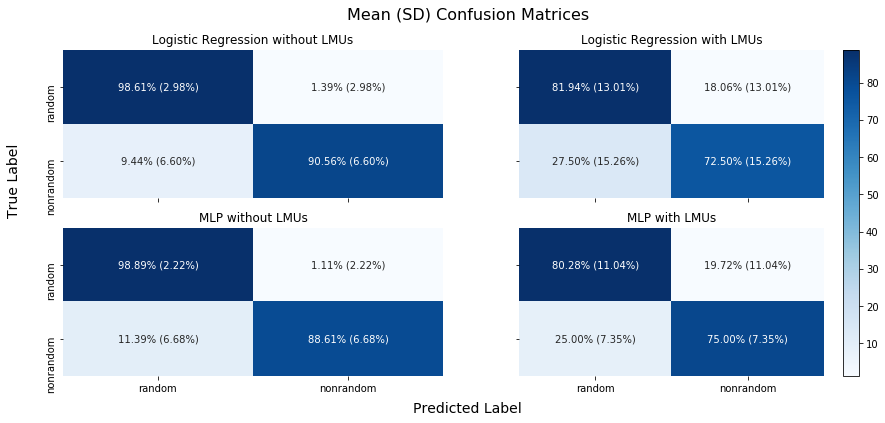

In [65]:
#Plot average confusion matrix
ticklabels=['random', 'nonrandom']

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(15, 6))

labels1=np.array([[f'{lrr_confusion.mean(0)[0][0]/18*100:.2f}'+'%'+' ('+f'{lrr_confusion.std(0)[0][0]/18*100:.2f}'+'%)',
                  f'{lrr_confusion.mean(0)[0][1]/18*100:.2f}'+'%'+' ('+f'{lrr_confusion.std(0)[0][1]/18*100:.2f}'+'%)',],
                 [f'{lrr_confusion.mean(0)[1][0]/18*100:.2f}'+'%'+' ('+f'{lrr_confusion.std(0)[1][0]/18*100:.2f}'+'%)',
                  f'{lrr_confusion.mean(0)[1][1]/18*100:.2f}'+'%'+' ('+f'{lrr_confusion.std(0)[1][1]/18*100:.2f}'+'%)',]])
im = sns.heatmap(lrr_confusion.mean(0)/20*100, annot=labels1, fmt='', cmap='Blues', xticklabels=ticklabels, yticklabels=ticklabels, cbar=False, ax=ax1)
ax1.set_title('Logistic Regression without LMUs', fontsize=12)

labels2=np.array([[f'{lrl_confusion.mean(0)[0][0]/18*100:.2f}'+'%'+' ('+f'{lrl_confusion.std(0)[0][0]/18*100:.2f}'+'%)',
                  f'{lrl_confusion.mean(0)[0][1]/18*100:.2f}'+'%'+' ('+f'{lrl_confusion.std(0)[0][1]/18*100:.2f}'+'%)',],
                 [f'{lrl_confusion.mean(0)[1][0]/18*100:.2f}'+'%'+' ('+f'{lrl_confusion.std(0)[1][0]/18*100:.2f}'+'%)',
                  f'{lrl_confusion.mean(0)[1][1]/18*100:.2f}'+'%'+' ('+f'{lrl_confusion.std(0)[1][1]/18*100:.2f}'+'%)',]])
sns.heatmap(lrl_confusion.mean(0)/20*100, annot=labels2, fmt='', cmap='Blues', xticklabels=ticklabels, yticklabels=ticklabels, cbar=False, ax=ax2)
ax2.set_title('Logistic Regression with LMUs', fontsize=12)

labels3=np.array([[f'{mlpr_confusion.mean(0)[0][0]/18*100:.2f}'+'%'+' ('+f'{mlpr_confusion.std(0)[0][0]/18*100:.2f}'+'%)',
                  f'{mlpr_confusion.mean(0)[0][1]/18*100:.2f}'+'%'+' ('+f'{mlpr_confusion.std(0)[0][1]/18*100:.2f}'+'%)',],
                 [f'{mlpr_confusion.mean(0)[1][0]/18*100:.2f}'+'%'+' ('+f'{mlpr_confusion.std(0)[1][0]/18*100:.2f}'+'%)',
                  f'{mlpr_confusion.mean(0)[1][1]/18*100:.2f}'+'%'+' ('+f'{mlpr_confusion.std(0)[1][1]/18*100:.2f}'+'%)',]])
sns.heatmap(mlpr_confusion.mean(0)/20*100, annot=labels3, fmt='', cmap='Blues', xticklabels=ticklabels, yticklabels=ticklabels, cbar=False, ax=ax3)
ax3.set_title('MLP without LMUs', fontsize=12)

labels4=np.array([[f'{mlpl_confusion.mean(0)[0][0]/18*100:.2f}'+'%'+' ('+f'{mlpl_confusion.std(0)[0][0]/18*100:.2f}'+'%)',
                  f'{mlpl_confusion.mean(0)[0][1]/18*100:.2f}'+'%'+' ('+f'{mlpl_confusion.std(0)[0][1]/18*100:.2f}'+'%)',],
                 [f'{mlpl_confusion.mean(0)[1][0]/18*100:.2f}'+'%'+' ('+f'{mlpl_confusion.std(0)[1][0]/18*100:.2f}'+'%)',
                  f'{mlpl_confusion.mean(0)[1][1]/18*100:.2f}'+'%'+' ('+f'{mlpl_confusion.std(0)[1][1]/18*100:.2f}'+'%)',]])
sns.heatmap(mlpl_confusion.mean(0)/20*100, annot=labels4, fmt='', cmap='Blues', xticklabels=ticklabels, yticklabels=ticklabels, cbar=False, ax=ax4)
ax4.set_title('MLP with LMUs', fontsize=12)

fig.suptitle('Mean (SD) Confusion Matrices', fontsize=16)
fig.text(0.5, 0.04, 'Predicted Label', ha='center', fontsize=14)
fig.text(0.08, 0.5, 'True Label', ha='center', rotation='vertical', fontsize=14)
mappable = im.get_children()[0]
fig.colorbar(mappable, ax = [ax2,ax4],orientation = 'vertical')
fig.savefig('random_confusion.png')

# KNN High vs. Intermediate vs. Low

## Logistic Regression without LMUs

First we take 18 samples from each engagement class in each of the 20 experiments.

In [66]:
lst=[]
start=0
end=106
for i in range(20):
    exp=summaries_lrraw[start:end]
    sample = exp[:18]
    #get random sample of 18 intermediate clips from first experiment
    sample = np.append(sample, random.sample(list(exp[exp[:,4]=='mid']),18),0) 
    sample = np.append(sample, exp[70:88],0) 
    lst.append(sample)
    start+=106
    end+=106
lrraw_in=np.asarray(lst)

Now run kNN (k=5) to see how well these classes cluster based on clip mean, standard deviation, skewness and kurtosis

In [67]:
lrr_scores=[]
lrr_confusion=np.zeros((20,3,3))

for i in range(20):
    X = lrraw_in[i][:,:4]
    X = X.astype(np.float)
    y = lrraw_in[i][:,4]
    
    #clf = LogisticRegression(solver='lbfgs', multi_class='multinomial').fit(X, y)
    clf = KNeighborsClassifier(n_neighbors=5).fit(X, y)
    lrr_scores.append(clf.score(X, y))
    y_pred=clf.predict(X)
    lrr_confusion[i]=confusion_matrix(y, y_pred, labels=['high', 'mid', 'low'])
    
print('Logistic Regression using mean, sd, skewness and kurtosis as predictors.')
print('Actual Mean Score:           ', np.asarray(lrr_scores).mean())
print('Actual Standard Deviation:   ', np.asarray(lrr_scores).std())

Logistic Regression using mean, sd, skewness and kurtosis as predictors.
Actual Mean Score:            0.5833333333333333
Actual Standard Deviation:    0.058414112205879665


## Logistic Regression with LMUs

First we take 18 samples from each engagement class in each of the 20 experiments.

In [68]:
lst=[]
start=0
end=106
for i in range(20):
    exp=summaries_lrlmu[start:end]
    sample = exp[:18]
    #get random sample of 18 intermediate clips from first experiment
    sample = np.append(sample, random.sample(list(exp[exp[:,4]=='mid']),18),0) 
    sample = np.append(sample, exp[70:88],0) 
    lst.append(sample)
    start+=106
    end+=106
lrlmu_in=np.asarray(lst)

Now run kNN (k=5) to see how well these classes cluster based on clip mean, standard deviation, skewness and kurtosis

In [69]:
lrl_scores=[]
lrl_confusion=np.zeros((20,3,3))

for i in range(20):
    X = lrlmu_in[i][:,:4]
    X = X.astype(np.float)
    y = lrlmu_in[i][:,4]
    
    #clf = LogisticRegression(solver='lbfgs', multi_class='multinomial').fit(X, y)
    clf = KNeighborsClassifier(n_neighbors=5).fit(X, y)
    lrl_scores.append(clf.score(X, y))
    y_pred=clf.predict(X)
    lrl_confusion[i]=confusion_matrix(y, y_pred, labels=['high', 'mid', 'low'])
    
print('Logistic Regression using mean, sd, skewness and kurtosis as predictors.')
print('Actual Mean Score:           ', np.asarray(lrl_scores).mean())
print('Actual Standard Deviation:   ', np.asarray(lrl_scores).std())

Logistic Regression using mean, sd, skewness and kurtosis as predictors.
Actual Mean Score:            0.587962962962963
Actual Standard Deviation:    0.050333251573803264


## MLP without LMUs

First we take 18 samples from each engagement class in each of the 20 experiments.

In [70]:
lst=[]
start=0
end=106
for i in range(20):
    exp=summaries_mlpraw[start:end]
    sample = exp[:18]
    #get random sample of 18 intermediate clips from first experiment
    sample = np.append(sample, random.sample(list(exp[exp[:,4]=='mid']),18),0) 
    sample = np.append(sample, exp[70:88],0) 
    lst.append(sample)
    start+=106
    end+=106
mlpraw_in=np.asarray(lst)

Now run kNN (k=5) to see how well these classes cluster based on clip mean, standard deviation, skewness and kurtosis

In [71]:
mlpr_scores=[]
mlpr_confusion=np.zeros((20,3,3))

for i in range(20):
    X = mlpraw_in[i][:,:4]
    X = X.astype(np.float)
    y = mlpraw_in[i][:,4]
    
    #clf = LogisticRegression(solver='lbfgs', multi_class='multinomial').fit(X, y)
    clf = KNeighborsClassifier(n_neighbors=5).fit(X, y)
    mlpr_scores.append(clf.score(X, y))
    y_pred=clf.predict(X)
    mlpr_confusion[i]=confusion_matrix(y, y_pred, labels=['high', 'mid', 'low'])
    
print('Logistic Regression using mean, sd, skewness and kurtosis as predictors.')
print('Actual Mean Score:           ', np.asarray(mlpr_scores).mean())
print('Actual Standard Deviation:   ', np.asarray(mlpr_scores).std())

Logistic Regression using mean, sd, skewness and kurtosis as predictors.
Actual Mean Score:            0.5324074074074074
Actual Standard Deviation:    0.04999142587664108


## MLP with LMUs

First we take 18 samples from each engagement class in each of the 20 experiments.

In [72]:
lst=[]
start=0
end=106
for i in range(20):
    exp=summaries_mlplmu[start:end]
    sample = exp[:18]
    #get random sample of 18 intermediate clips from first experiment
    sample = np.append(sample, random.sample(list(exp[exp[:,4]=='mid']),18),0) 
    sample = np.append(sample, exp[70:88],0) 
    lst.append(sample)
    start+=106
    end+=106
mlplmu_in=np.asarray(lst)

Now run kNN (k=5) to see how well these classes cluster based on clip mean, standard deviation, skewness and kurtosis

In [73]:
mlpl_scores=[]
mlpl_confusion=np.zeros((20,3,3))

for i in range(20):
    X = mlplmu_in[i][:,:4]
    X = X.astype(np.float)
    y = mlplmu_in[i][:,4]
    
    #clf = LogisticRegression(solver='lbfgs', multi_class='multinomial').fit(X, y)
    clf = KNeighborsClassifier(n_neighbors=5).fit(X, y)
    mlpl_scores.append(clf.score(X, y))
    y_pred=clf.predict(X)
    mlpl_confusion[i]=confusion_matrix(y, y_pred, labels=['high', 'mid', 'low'])
    
print('Logistic Regression using mean, sd, skewness and kurtosis as predictors.')
print('Actual Mean Score:           ', np.asarray(mlpl_scores).mean())
print('Actual Standard Deviation:   ', np.asarray(mlpl_scores).std())

Logistic Regression using mean, sd, skewness and kurtosis as predictors.
Actual Mean Score:            0.624074074074074
Actual Standard Deviation:    0.05074885039275821


## Confusion Matrices

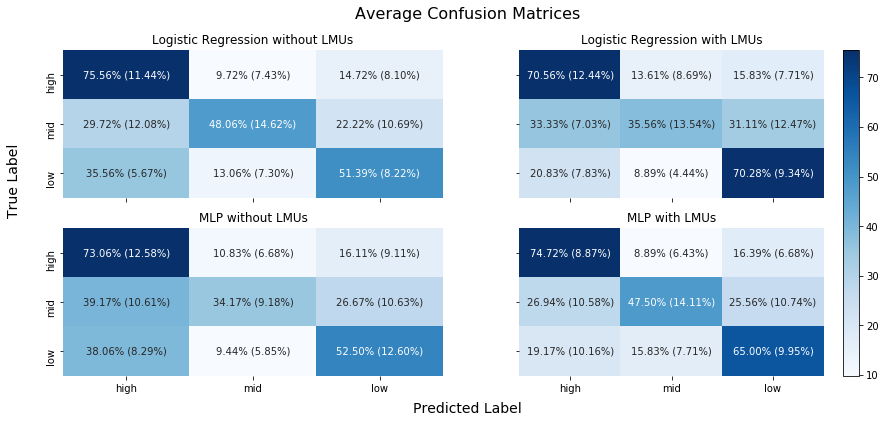

In [74]:
#Plot average confusion matrix
ticklabels=['high', 'mid', 'low']

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(15, 6))

labels1=np.array([[f'{lrr_confusion.mean(0)[0][0]/18*100:.2f}'+'%'+' ('+f'{lrr_confusion.std(0)[0][0]/18*100:.2f}'+'%)',
                  f'{lrr_confusion.mean(0)[0][1]/18*100:.2f}'+'%'+' ('+f'{lrr_confusion.std(0)[0][1]/18*100:.2f}'+'%)',
                  f'{lrr_confusion.mean(0)[0][2]/18*100:.2f}'+'%'+' ('+f'{lrr_confusion.std(0)[0][2]/18*100:.2f}'+'%)',],
                 [f'{lrr_confusion.mean(0)[1][0]/18*100:.2f}'+'%'+' ('+f'{lrr_confusion.std(0)[1][0]/18*100:.2f}'+'%)',
                  f'{lrr_confusion.mean(0)[1][1]/18*100:.2f}'+'%'+' ('+f'{lrr_confusion.std(0)[1][1]/18*100:.2f}'+'%)',
                 f'{lrr_confusion.mean(0)[1][2]/18*100:.2f}'+'%'+' ('+f'{lrr_confusion.std(0)[1][2]/18*100:.2f}'+'%)',],
                 [f'{lrr_confusion.mean(0)[2][0]/18*100:.2f}'+'%'+' ('+f'{lrr_confusion.std(0)[2][0]/18*100:.2f}'+'%)',
                  f'{lrr_confusion.mean(0)[2][1]/18*100:.2f}'+'%'+' ('+f'{lrr_confusion.std(0)[2][1]/18*100:.2f}'+'%)',
                 f'{lrr_confusion.mean(0)[2][2]/18*100:.2f}'+'%'+' ('+f'{lrr_confusion.std(0)[2][2]/18*100:.2f}'+'%)',]])
im = sns.heatmap(lrr_confusion.mean(0)/18*100, annot=labels1, fmt='', cmap='Blues', xticklabels=ticklabels, yticklabels=ticklabels, cbar=False, ax=ax1)
ax1.set_title('Logistic Regression without LMUs', fontsize=12)

labels2=np.array([[f'{lrl_confusion.mean(0)[0][0]/18*100:.2f}'+'%'+' ('+f'{lrl_confusion.std(0)[0][0]/18*100:.2f}'+'%)',
                  f'{lrl_confusion.mean(0)[0][1]/18*100:.2f}'+'%'+' ('+f'{lrl_confusion.std(0)[0][1]/18*100:.2f}'+'%)',
                  f'{lrl_confusion.mean(0)[0][2]/18*100:.2f}'+'%'+' ('+f'{lrl_confusion.std(0)[0][2]/18*100:.2f}'+'%)',],
                 [f'{lrl_confusion.mean(0)[1][0]/18*100:.2f}'+'%'+' ('+f'{lrl_confusion.std(0)[1][0]/18*100:.2f}'+'%)',
                  f'{lrl_confusion.mean(0)[1][1]/18*100:.2f}'+'%'+' ('+f'{lrl_confusion.std(0)[1][1]/18*100:.2f}'+'%)',
                 f'{lrl_confusion.mean(0)[1][2]/18*100:.2f}'+'%'+' ('+f'{lrl_confusion.std(0)[1][2]/18*100:.2f}'+'%)',],
                 [f'{lrl_confusion.mean(0)[2][0]/18*100:.2f}'+'%'+' ('+f'{lrl_confusion.std(0)[2][0]/18*100:.2f}'+'%)',
                  f'{lrl_confusion.mean(0)[2][1]/18*100:.2f}'+'%'+' ('+f'{lrl_confusion.std(0)[2][1]/18*100:.2f}'+'%)',
                 f'{lrl_confusion.mean(0)[2][2]/18*100:.2f}'+'%'+' ('+f'{lrl_confusion.std(0)[2][2]/18*100:.2f}'+'%)',]])
sns.heatmap(lrl_confusion.mean(0)/18*100, annot=labels2, fmt='', cmap='Blues', xticklabels=ticklabels, yticklabels=ticklabels, cbar=False, ax=ax2)
ax2.set_title('Logistic Regression with LMUs', fontsize=12)

labels3=np.array([[f'{mlpr_confusion.mean(0)[0][0]/18*100:.2f}'+'%'+' ('+f'{mlpr_confusion.std(0)[0][0]/18*100:.2f}'+'%)',
                  f'{mlpr_confusion.mean(0)[0][1]/18*100:.2f}'+'%'+' ('+f'{mlpr_confusion.std(0)[0][1]/18*100:.2f}'+'%)',
                  f'{mlpr_confusion.mean(0)[0][2]/18*100:.2f}'+'%'+' ('+f'{mlpr_confusion.std(0)[0][2]/18*100:.2f}'+'%)',],
                 [f'{mlpr_confusion.mean(0)[1][0]/18*100:.2f}'+'%'+' ('+f'{mlpr_confusion.std(0)[1][0]/18*100:.2f}'+'%)',
                  f'{mlpr_confusion.mean(0)[1][1]/18*100:.2f}'+'%'+' ('+f'{mlpr_confusion.std(0)[1][1]/18*100:.2f}'+'%)',
                 f'{mlpr_confusion.mean(0)[1][2]/18*100:.2f}'+'%'+' ('+f'{mlpr_confusion.std(0)[1][2]/18*100:.2f}'+'%)',],
                 [f'{mlpr_confusion.mean(0)[2][0]/18*100:.2f}'+'%'+' ('+f'{mlpr_confusion.std(0)[2][0]/18*100:.2f}'+'%)',
                  f'{mlpr_confusion.mean(0)[2][1]/18*100:.2f}'+'%'+' ('+f'{mlpr_confusion.std(0)[2][1]/18*100:.2f}'+'%)',
                 f'{mlpr_confusion.mean(0)[2][2]/18*100:.2f}'+'%'+' ('+f'{mlpr_confusion.std(0)[2][2]/18*100:.2f}'+'%)',]])
sns.heatmap(mlpr_confusion.mean(0)/18*100, annot=labels3, fmt='', cmap='Blues', xticklabels=ticklabels, yticklabels=ticklabels, cbar=False, ax=ax3)
ax3.set_title('MLP without LMUs', fontsize=12)

labels4=np.array([[f'{mlpl_confusion.mean(0)[0][0]/18*100:.2f}'+'%'+' ('+f'{mlpl_confusion.std(0)[0][0]/18*100:.2f}'+'%)',
                  f'{mlpl_confusion.mean(0)[0][1]/18*100:.2f}'+'%'+' ('+f'{mlpl_confusion.std(0)[0][1]/18*100:.2f}'+'%)',
                  f'{mlpl_confusion.mean(0)[0][2]/18*100:.2f}'+'%'+' ('+f'{mlpl_confusion.std(0)[0][2]/18*100:.2f}'+'%)',],
                 [f'{mlpl_confusion.mean(0)[1][0]/18*100:.2f}'+'%'+' ('+f'{mlpl_confusion.std(0)[1][0]/18*100:.2f}'+'%)',
                  f'{mlpl_confusion.mean(0)[1][1]/18*100:.2f}'+'%'+' ('+f'{mlpl_confusion.std(0)[1][1]/18*100:.2f}'+'%)',
                 f'{mlpl_confusion.mean(0)[1][2]/18*100:.2f}'+'%'+' ('+f'{mlpl_confusion.std(0)[1][2]/18*100:.2f}'+'%)',],
                 [f'{mlpl_confusion.mean(0)[2][0]/18*100:.2f}'+'%'+' ('+f'{mlpl_confusion.std(0)[2][0]/18*100:.2f}'+'%)',
                  f'{mlpl_confusion.mean(0)[2][1]/18*100:.2f}'+'%'+' ('+f'{mlpl_confusion.std(0)[2][1]/18*100:.2f}'+'%)',
                 f'{mlpl_confusion.mean(0)[2][2]/18*100:.2f}'+'%'+' ('+f'{mlpl_confusion.std(0)[2][2]/18*100:.2f}'+'%)',]])
sns.heatmap(mlpl_confusion.mean(0)/18*100, annot=labels4, fmt='', cmap='Blues', xticklabels=ticklabels, yticklabels=ticklabels, cbar=False, ax=ax4)
ax4.set_title('MLP with LMUs', fontsize=12)

fig.suptitle('Average Confusion Matrices', fontsize=16)
fig.text(0.5, 0.04, 'Predicted Label', ha='center', fontsize=14)
fig.text(0.08, 0.5, 'True Label', ha='center', rotation='vertical', fontsize=14)
mappable = im.get_children()[0]
fig.colorbar(mappable, ax = [ax2,ax4],orientation = 'vertical')
fig.savefig('engagement_confusion.png')


## PCA - Visualising the kNN space in 3D

Run the PCA on descriptive statistics of output from each approach separately. Use only output from high, intermediate and low engagement input.

In [280]:
pca = PCA(n_components=3)

pca_lrraw = []
pca_lrlmu = []
pca_mlpraw = []
pca_mlplmu = []
start=0
end=106
for i in range(20):
    pca_lrraw.append(summaries_lrraw[start:int(start+88)])
    pca_lrlmu.append(summaries_lrlmu[start:int(start+88)])
    pca_mlpraw.append(summaries_mlpraw[start:int(start+88)])
    pca_mlplmu.append(summaries_mlplmu[start:int(start+88)])
    start += 106
    end += 106
pca_lrraw = np.vstack(pca_lrraw)
pca_lrlmu = np.vstack(pca_lrlmu)
pca_mlpraw = np.vstack(pca_mlpraw)
pca_mlplmu = np.vstack(pca_mlplmu)

X = pca_lrraw[:,:4]
pca.fit(X)
print('Logistic Regression without LMUs', pca.explained_variance_ratio_)
lrrawpca_high = pca.transform(high_lrraw_summary)
lrrawpca_mid = pca.transform(mid_lrraw_summary)
lrrawpca_low = pca.transform(low_lrraw_summary)

X = pca_lrlmu[:,:4]
pca.fit(X)
print('Logistic Regression with LMUs', pca.explained_variance_ratio_)
lrlmupca_high = pca.transform(high_lrlmu_summary)
lrlmupca_mid = pca.transform(mid_lrlmu_summary)
lrlmupca_low = pca.transform(low_lrlmu_summary)

X = pca_mlpraw[:,:4]
pca.fit(X)
print('MLP without LMUs', pca.explained_variance_ratio_)
mlprawpca_high = pca.transform(high_mlpraw_summary)
mlprawpca_mid = pca.transform(mid_mlpraw_summary)
mlprawpca_low = pca.transform(low_mlpraw_summary)

X = pca_mlplmu[:,:4]
pca.fit(X)
print('MLP with LMUs', pca.explained_variance_ratio_)
mlplmupca_high = pca.transform(high_mlplmu_summary)
mlplmupca_mid = pca.transform(mid_mlplmu_summary)
mlplmupca_low = pca.transform(low_mlplmu_summary)


Logistic Regression without LMUs [0.94401678 0.05478292 0.00102111]
Logistic Regression with LMUs [9.85186868e-01 1.47325249e-02 5.51275051e-05]
MLP without LMUs [9.98474732e-01 1.52105552e-03 3.30892673e-06]
MLP with LMUs [9.99173489e-01 8.25852674e-04 4.94035482e-07]


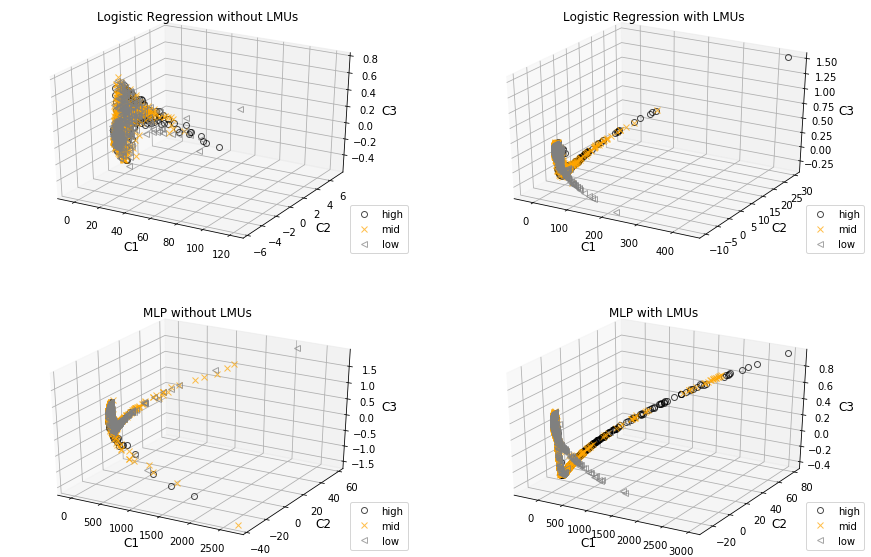

In [357]:
fig = plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(2,2)

ax1=fig.add_subplot(gs[0,0], projection='3d')
ax1.plot(lrrawpca_high[:,0],lrrawpca_high[:,1],lrrawpca_high[:,2], linestyle='none',alpha=0.7, marker='o',markeredgecolor='black',markerfacecolor='None',label='high')
ax1.plot(lrrawpca_mid[:,0],lrrawpca_mid[:,1],lrrawpca_mid[:,2], linestyle='none',alpha=0.7, marker='x',markeredgecolor='orange',markerfacecolor='None',label='mid')
ax1.plot(lrrawpca_low[:,0],lrrawpca_low[:,1],lrrawpca_low[:,2], linestyle='none',alpha=0.7, marker='<',markeredgecolor='grey',markerfacecolor='None',label='low')
ax1.set_xlabel('C1', fontsize=12)
ax1.set_ylabel('C2', fontsize=12)
ax1.set_zlabel('C3', fontsize=12)
ax1.legend(loc=(0.9,0))
ax1.set_title('Logistic Regression without LMUs', fontsize=12)

ax2=fig.add_subplot(gs[0,1], projection='3d')
ax2.plot(lrlmupca_high[:,0],lrlmupca_high[:,1],lrlmupca_high[:,2], linestyle='none',alpha=0.7, marker='o',markeredgecolor='black',markerfacecolor='None',label='high')
ax2.plot(lrlmupca_mid[:,0],lrlmupca_mid[:,1],lrlmupca_mid[:,2], linestyle='none',alpha=0.7, marker='x',markeredgecolor='orange',markerfacecolor='None',label='mid')
ax2.plot(lrlmupca_low[:,0],lrlmupca_low[:,1],lrlmupca_low[:,2], linestyle='none',alpha=0.7, marker='<',markeredgecolor='grey',markerfacecolor='None',label='low')
ax2.set_xlabel('C1', fontsize=12)
ax2.set_ylabel('C2', fontsize=12)
ax2.set_zlabel('C3', fontsize=12)
ax2.legend(loc=(0.9,0))
ax2.set_title('Logistic Regression with LMUs', fontsize=12)

ax3=fig.add_subplot(gs[1,0], projection='3d')
ax3.plot(mlprawpca_high[:,0],mlprawpca_high[:,1],mlprawpca_high[:,2], linestyle='none',alpha=0.7, marker='o',markeredgecolor='black',markerfacecolor='None',label='high')
ax3.plot(mlprawpca_mid[:,0],mlprawpca_mid[:,1],mlprawpca_mid[:,2], linestyle='none',alpha=0.7, marker='x',markeredgecolor='orange',markerfacecolor='None',label='mid')
ax3.plot(mlprawpca_low[:,0],mlprawpca_low[:,1],mlprawpca_low[:,2], linestyle='none',alpha=0.7, marker='<',markeredgecolor='grey',markerfacecolor='None',label='low')
ax3.set_xlabel('C1', fontsize=12)
ax3.set_ylabel('C2', fontsize=12)
ax3.set_zlabel('C3', fontsize=12)
ax3.legend(loc=(0.9,0))
ax3.set_title('MLP without LMUs', fontsize=12)

ax4=fig.add_subplot(gs[1,1], projection='3d')
ax4.plot(mlplmupca_high[:,0],mlplmupca_high[:,1],mlplmupca_high[:,2], linestyle='none',alpha=0.7, marker='o',markeredgecolor='black',markerfacecolor='None',label='high')
ax4.plot(mlplmupca_mid[:,0],mlplmupca_mid[:,1],mlplmupca_mid[:,2], linestyle='none',alpha=0.7, marker='x',markeredgecolor='orange',markerfacecolor='None',label='mid')
ax4.plot(mlplmupca_low[:,0],mlplmupca_low[:,1],mlplmupca_low[:,2], linestyle='none',alpha=0.7, marker='<',markeredgecolor='grey',markerfacecolor='None',label='low')
ax4.set_xlabel('C1', fontsize=12)
ax4.set_ylabel('C2', fontsize=12)
ax4.set_zlabel('C3', fontsize=12)
ax4.legend(loc=(0.9,0))
ax4.set_title('MLP with LMUs', fontsize=12)
fig.savefig('engagement_pca.png')

## Effect of Classifier and Pre-processing on kNN performance

In [91]:
lrr_kNNscores=pd.DataFrame(lrr_scores)
lrr_kNNscores['classifier']='classifier1'
lrr_kNNscores['preprocess']='preprocess1'

lrl_kNNscores=pd.DataFrame(lrl_scores)
lrl_kNNscores['classifier']='classifier1'
lrl_kNNscores['preprocess']='preprocess2'

mlpr_kNNscores=pd.DataFrame(mlpr_scores)
mlpr_kNNscores['classifier']='classifier2'
mlpr_kNNscores['preprocess']='preprocess1'

mlpl_kNNscores=pd.DataFrame(mlpl_scores)
mlpl_kNNscores['classifier']='classifier2'
mlpl_kNNscores['preprocess']='preprocess2'

In [92]:
stacked_data=lrr_kNNscores.append(lrl_kNNscores)
stacked_data=stacked_data.append(mlpr_kNNscores)
stacked_data=stacked_data.append(mlpl_kNNscores)

stacked_data = stacked_data.rename(columns={0:'result'})

Create model

In [93]:
results = ols('result ~ classifier*preprocess', stacked_data).fit()

### Assumption Checks

Shapiro's test for normality - testing the residuals. If not significant the residuals are normally distributed.

In [94]:
stats.shapiro(results.resid)

(0.973619282245636, 0.09663457423448563)

Bartlett's test for equal variances between groups. If not significant the groups have equal variances.

In [95]:
stats.bartlett(stacked_data['result'][(stacked_data['classifier'] == 'classifier1') & (stacked_data['preprocess'] == 'preprocess1')],
             stacked_data['result'][(stacked_data['classifier'] == 'classifier1') & (stacked_data['preprocess'] == 'preprocess2')],
             stacked_data['result'][(stacked_data['classifier'] == 'classifier2') & (stacked_data['preprocess'] == 'preprocess1')],
             stacked_data['result'][(stacked_data['classifier'] == 'classifier2') & (stacked_data['preprocess'] == 'preprocess2')])

BartlettResult(statistic=0.6478983720700625, pvalue=0.8853847967495189)

### Two-Way ANOVA

In [96]:
rp.summary_cont(stacked_data.groupby(['classifier']))['result']

,N,Mean,SD,SE,95% Conf.,Interval
classifier,,,,,,
classifier1,40,0.585648,0.055268,0.008739,0.568520,0.602776
classifier2,40,0.578241,0.068970,0.010905,0.556867,0.599615


In [97]:
rp.summary_cont(stacked_data.groupby(['preprocess']))['result']

,N,Mean,SD,SE,95% Conf.,Interval
preprocess,,,,,,
preprocess1,40,0.557870,0.060798,0.009613,0.539029,0.576712
preprocess2,40,0.606019,0.054353,0.008594,0.589174,0.622863


In [98]:
rp.summary_cont(stacked_data.groupby(['classifier', 'preprocess']))['result']

N      Mean        SD        SE  95% Conf.  Interval
classifier  preprocess                                                        
classifier1 preprocess1  20  0.583333  0.059932  0.013401   0.557067  0.609600
            preprocess2  20  0.587963  0.051641  0.011547   0.565330  0.610596
classifier2 preprocess1  20  0.532407  0.051290  0.011469   0.509929  0.554886
            preprocess2  20  0.624074  0.052067  0.011643   0.601255  0.646894

In [99]:
aov_table = sm.stats.anova_lm(results, typ=2)

def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']
    
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
    
    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

anova_table(aov_table)

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
classifier,0.001097,1.0,0.001097,0.378404,0.540296,0.003589,-0.005841
preprocess,0.046365,1.0,0.046365,15.987553,0.000147,0.151646,0.140825
classifier:preprocess,0.037877,1.0,0.037877,13.060837,0.000539,0.123885,0.113325
Residual,0.220405,76.0,0.002900,NaN,NaN,NaN,NaN


Pairwise Comparisons using Tukey's HSD <br>
A results of ’reject = True’ means that a significant difference has been observed.

In [100]:
mc = statsmodels.stats.multicomp.MultiComparison(stacked_data['result'], stacked_data['classifier'])
mc_results = mc.tukeyhsd()
print(mc_results)

  Multiple Comparison of Means - Tukey HSD,FWER=0.05  
   group1      group2   meandiff  lower  upper  reject
------------------------------------------------------
classifier1 classifier2 -0.0074  -0.0352 0.0204 False 
------------------------------------------------------


In [101]:
mc = statsmodels.stats.multicomp.MultiComparison(stacked_data['result'], stacked_data['preprocess'])
mc_results = mc.tukeyhsd()
print(mc_results)

  Multiple Comparison of Means - Tukey HSD,FWER=0.05 
   group1      group2   meandiff lower  upper  reject
-----------------------------------------------------
preprocess1 preprocess2  0.0481  0.0225 0.0738  True 
-----------------------------------------------------
